In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bcnf.simulation.physics import physics_ODE_simulation, calculate_point_of_impact
from bcnf.camera import record_trajectory

In [6]:
def get_cam2_position(l):
    cam2_x = 25 * np.cos(l)
    cam2_y = 25 * np.sin(l)
    cam2_z = 1.5

    return np.array([cam2_x, cam2_y, cam2_z])

# create function to sample uniformy for the ballisitc parameters

def sample_ballistic_parameters():
    # pos
    x0_x = np.random.uniform(-25, 25)
    x0_y = np.random.uniform(-25, 25)
    x0_z = np.random.uniform(1, 2)

    x0 = np.array([x0_x, x0_y, x0_z])

    # velo
    v0_x = np.random.uniform(-20, 20)
    v0_y = np.random.uniform(-20, 20)
    v0_z = np.random.uniform(-1, 20)

    v0 = np.array([v0_x, v0_y, v0_z])

    # grav
    g_z = np.random.uniform(-0.1 * 9.81, -5 * 9.8)

    g = np.array([0, 0, g_z])

    # wind
    w_x = np.random.uniform(-10, 10)
    w_y = np.random.uniform(-10, 10)
    w_z = np.random.uniform(-5, 5)

    w = np.array([w_x, w_y, w_z])

    # drag coeff
    b = np.random.uniform(0.1, 1)

    # mass
    m = np.random.uniform(0.1, 0.6)

    # thrust
    a_x = np.random.uniform(-5, 5)
    a_y = np.random.uniform(-5, 5)
    a_z = np.random.uniform(-5, 5)

    a = np.array([a_x, a_y, a_z])

    # second cam position
    l = np.random.uniform(0, 2 * np.pi)

    return x0, v0, g, w, b, m, a, l

In [35]:
# sample uniformly while the pandas df has less than 1000 rows


df = pd.DataFrame(columns=[
    'x0_x', 'x0_y', 'x0_z',
    'v0_x', 'v0_y', 'v0_z',
    'g', 
    'w_x', 'w_y', 'w_z',
    'b', 'm', 
    'a_x', 'a_y', 'a_z',
    'l'])

SPF = 1 / 30
T = 3
cam1_pos = np.array([-25, 0, 1.5])

while df.shape[0] < 10000:
    x0, v0, g, w, b, m, a, l = sample_ballistic_parameters()
    traj = physics_ODE_simulation(x0, v0, g, w, b, m, a, T, SPF)
    
    # check whether ball is thrown further than 5 m
    if np.linalg.norm(traj[-1, :2] - x0[:2]) > 5:
        # check if ball is throw less than 25 m
        if np.linalg.norm(traj[-1, :2] - x0[:2]) < 50:
            cam2_pos = get_cam2_position(l)

            cam1 = record_trajectory(traj, (16,9), 70.0, cam1_pos, make_gif = False)
            cam2 = record_trajectory(traj, (16,9), 70.0, cam2_pos, make_gif = False)

            # check whether the ball is visible in at least 80 % of the combined frames
            if np.sum(cam1 + cam2) / (2 * len(cam1)) > 0.8:
                # add parameters to df
                df = pd.concat([
                    df,
                    pd.DataFrame({
                        'x0_x': x0[0],
                        'x0_y': x0[1],
                        'x0_z': x0[2],
                        'v0_x': v0[0],
                        'v0_y': v0[1],
                        'v0_z': v0[2],
                        'g': g[2],
                        'w_x': w[0],
                        'w_y': w[1],
                        'w_z': w[2],
                        'b': b,
                        'm': m,
                        'a_x': a[0],
                        'a_y': a[1],
                        'a_z': a[2],
                        'l': l
                    }, index=[0])
                ], ignore_index=True)

C:\Users\Chris\AppData\Local\Temp\ipykernel_1852\1676566091.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([


In [36]:
print(df)

           x0_x       x0_y      x0_z       v0_x       v0_y       v0_z  \
0      1.972904   3.644859  1.064853  -6.848922  -2.728030   3.352268   
1     -2.706915  -9.492094  1.072536   4.021446  13.562836   5.245928   
2     15.359110 -19.256824  1.077401  -8.541854 -19.942004  11.997910   
3     -4.531584  -8.672057  1.707363   2.058752  -8.464976  10.938401   
4     -7.022488   7.935167  1.126932  -0.542263  -2.301182   8.375155   
...         ...        ...       ...        ...        ...        ...   
9995  -9.217371  10.982655  1.846354 -10.341433  -8.648703   6.863455   
9996  11.924636   1.184411  1.588749 -13.886302 -12.889526  15.293882   
9997  22.034115  14.451308  1.815990   1.963031   0.521138  19.588761   
9998 -14.039913 -15.974692  1.504837  -4.255890   6.520592  16.346764   
9999  20.509133 -24.625248  1.426443 -11.910145   9.936489   5.964214   

              g       w_x       w_y       w_z         b         m       a_x  \
0    -12.731612 -8.781083 -6.597937 -1.71100

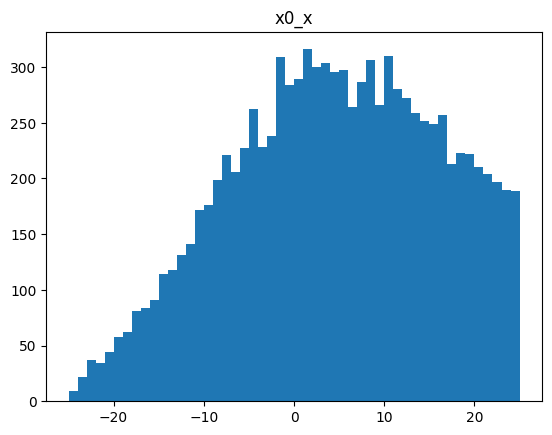

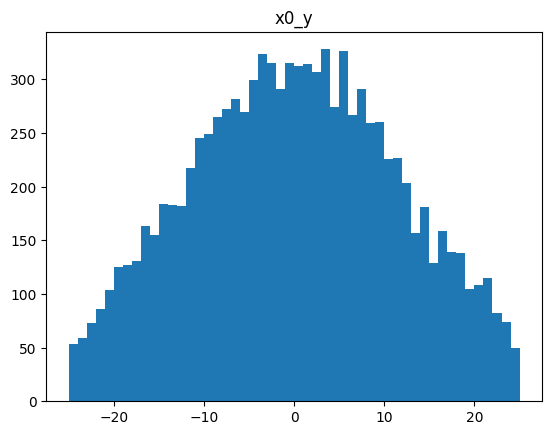

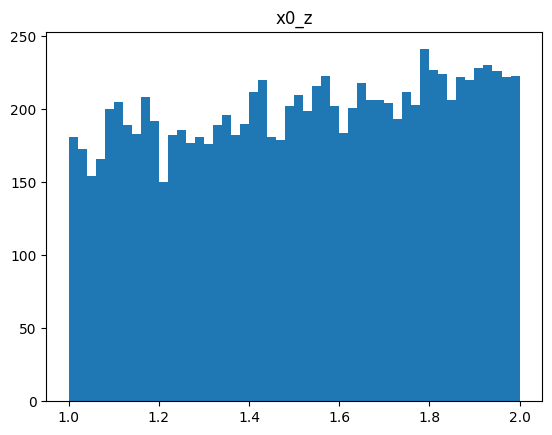

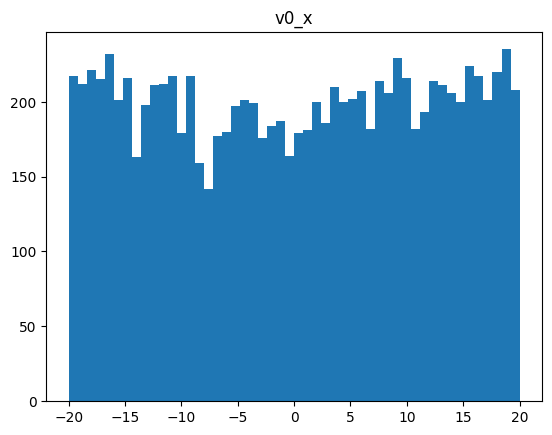

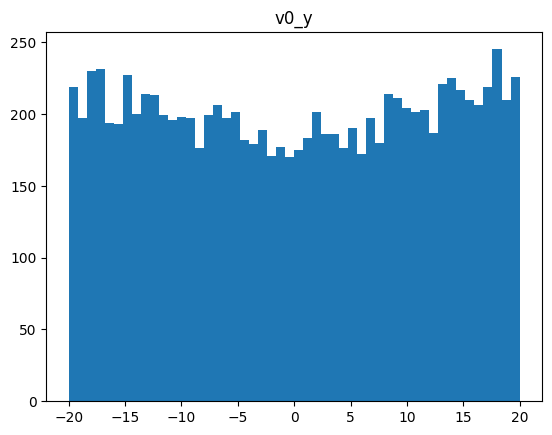

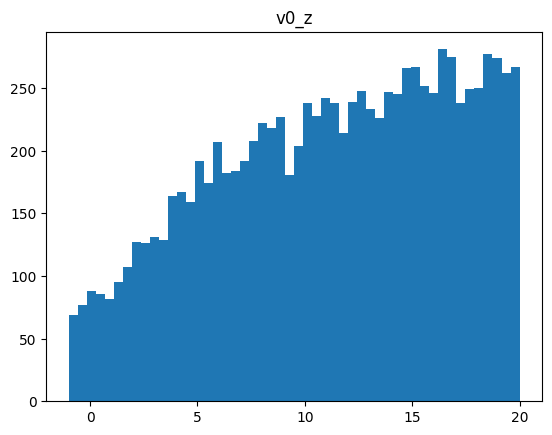

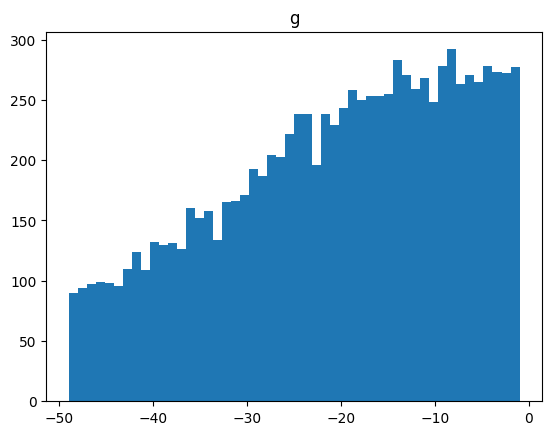

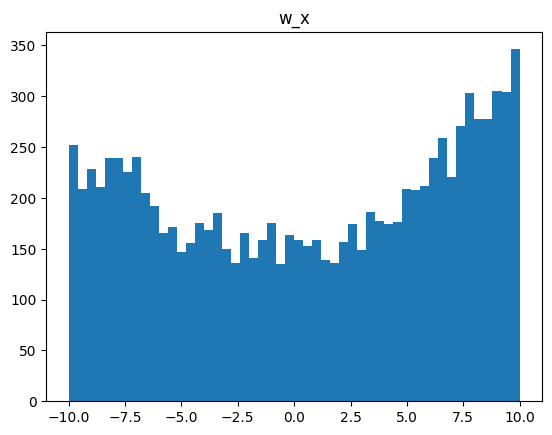

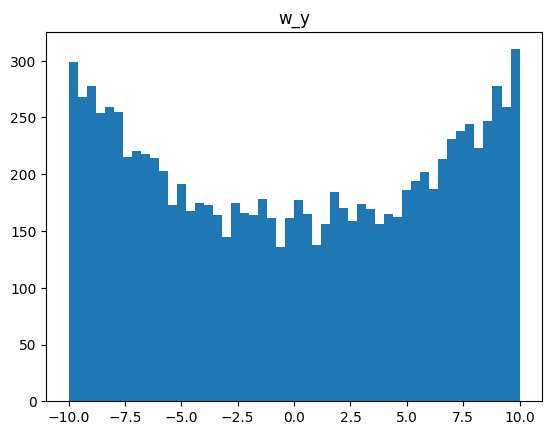

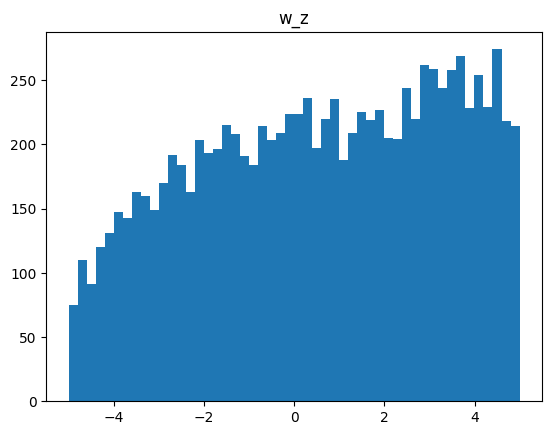

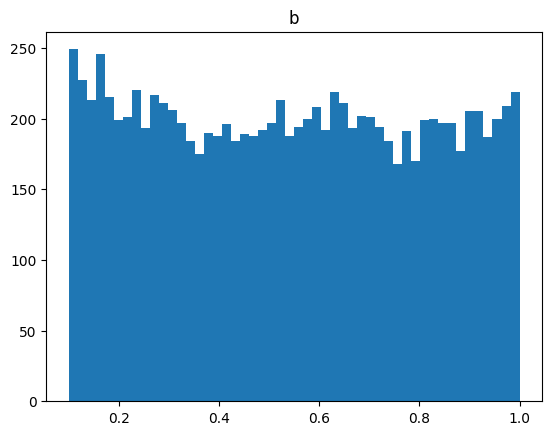

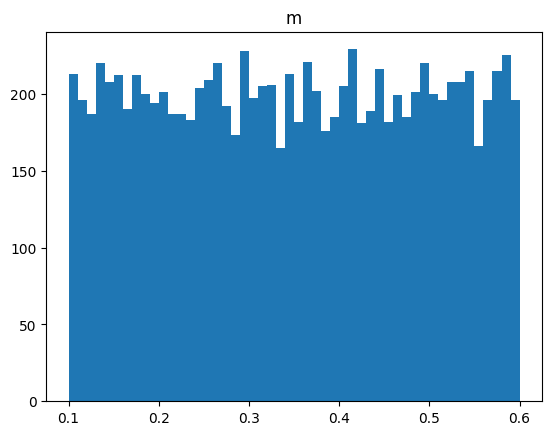

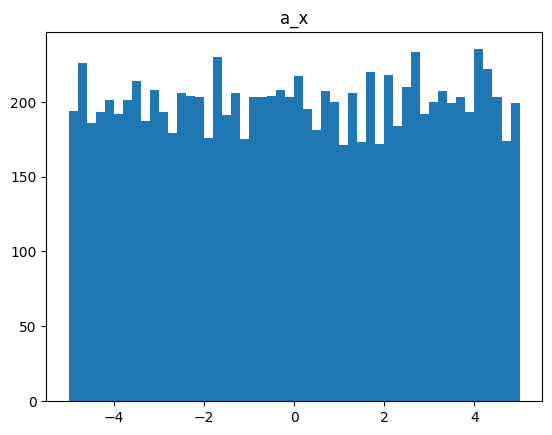

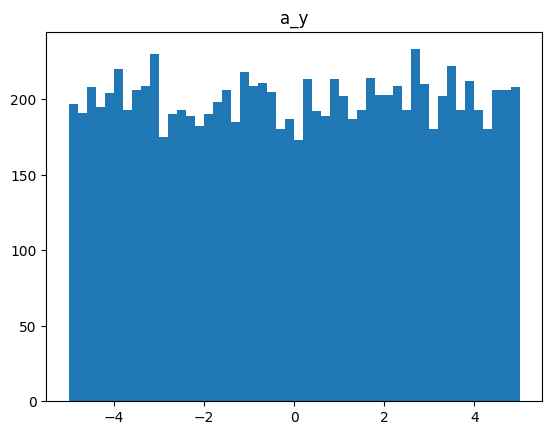

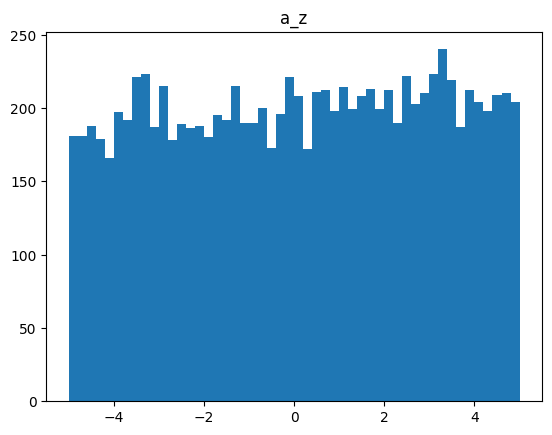

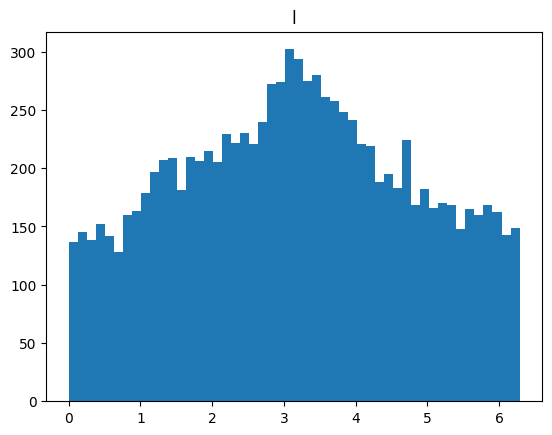

In [47]:
# plot each variable
for col in df.columns:
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.show()

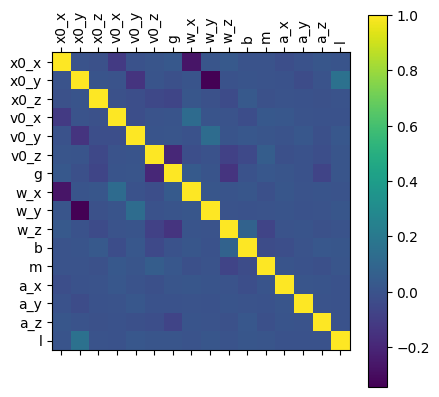

In [48]:
# plot correlation matrix
plt.matshow(df.corr())
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()
plt.show()

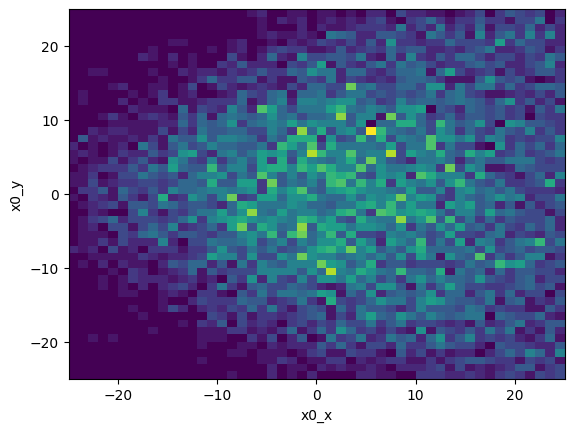

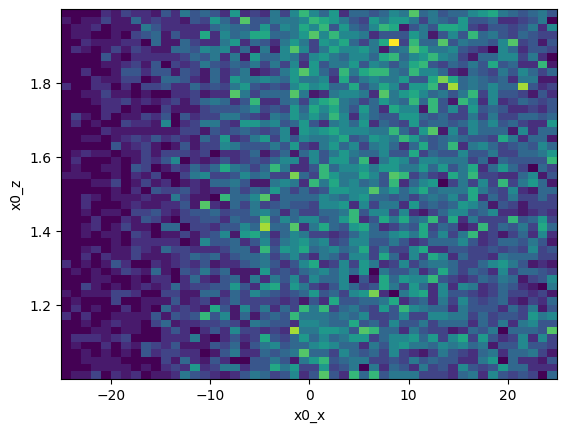

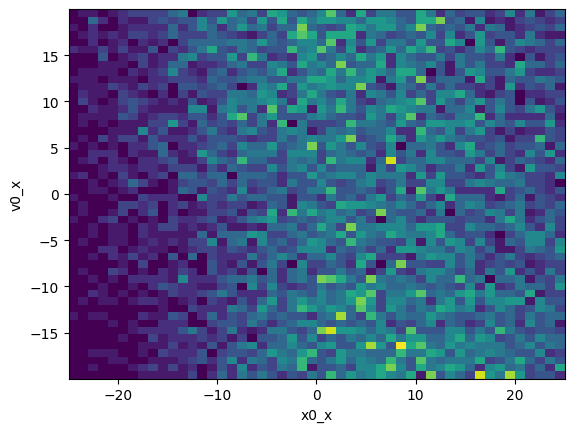

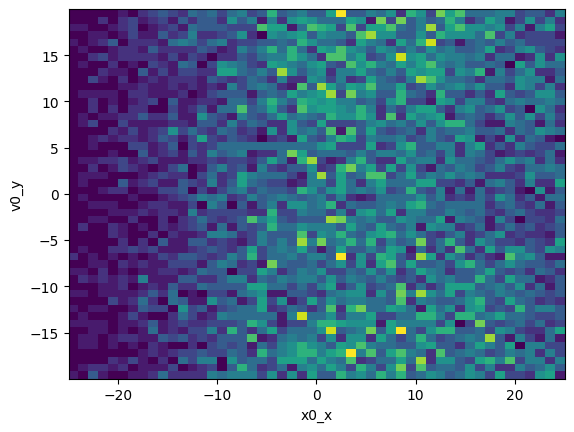

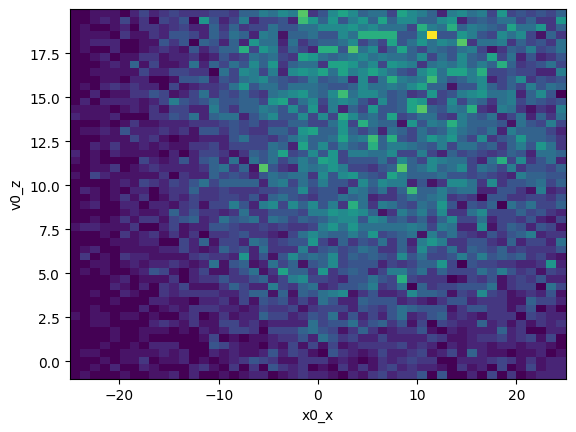

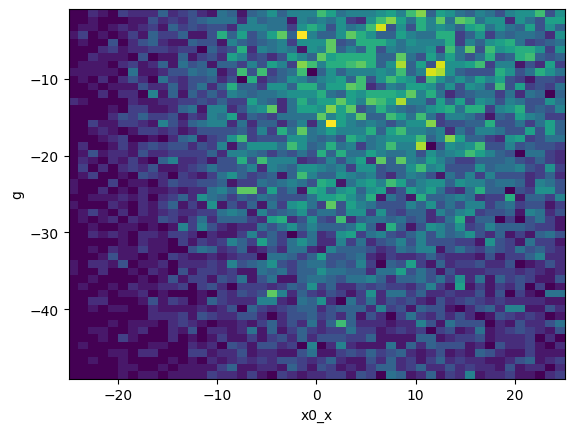

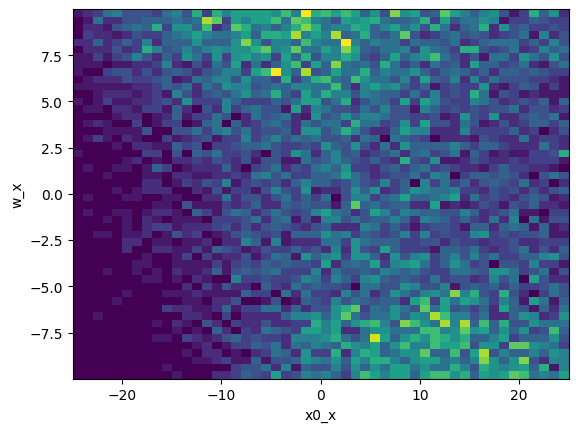

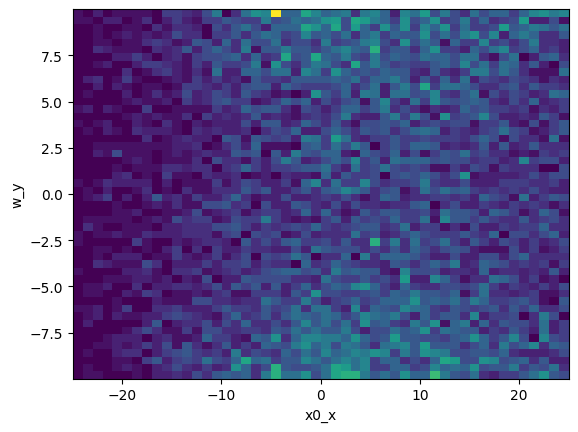

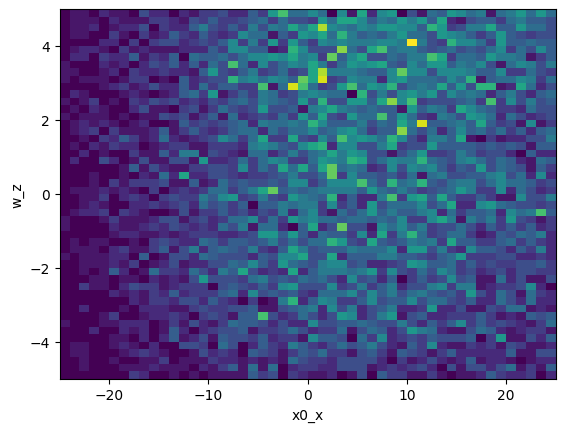

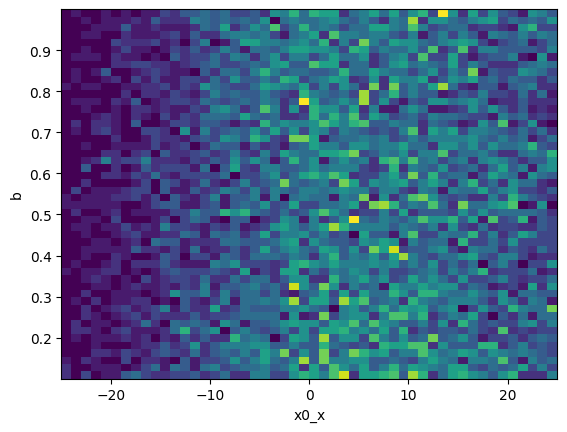

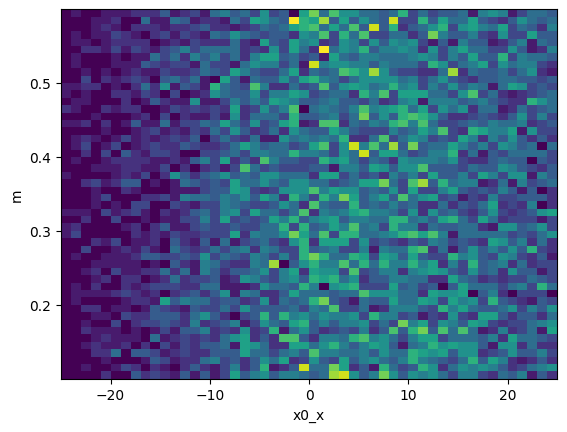

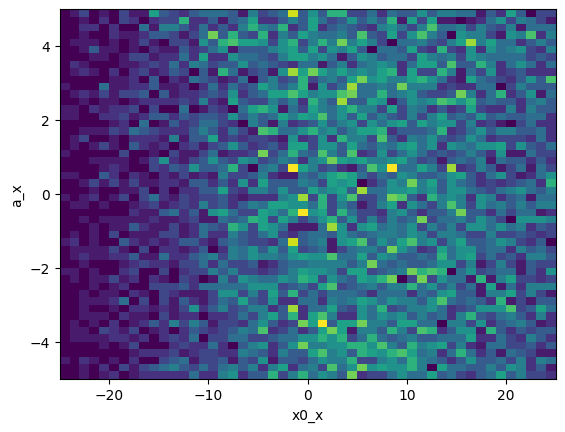

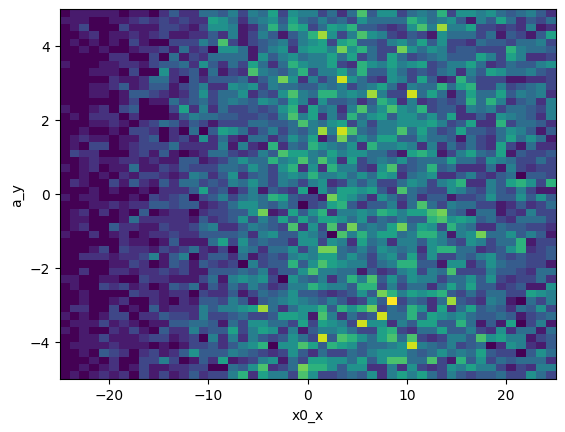

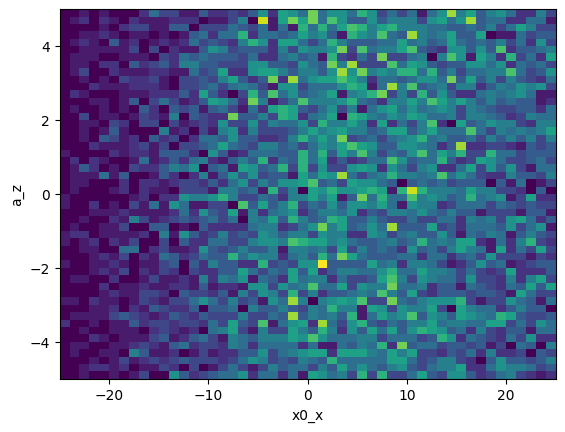

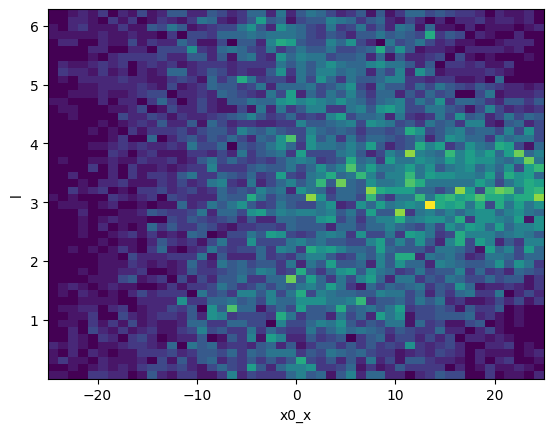

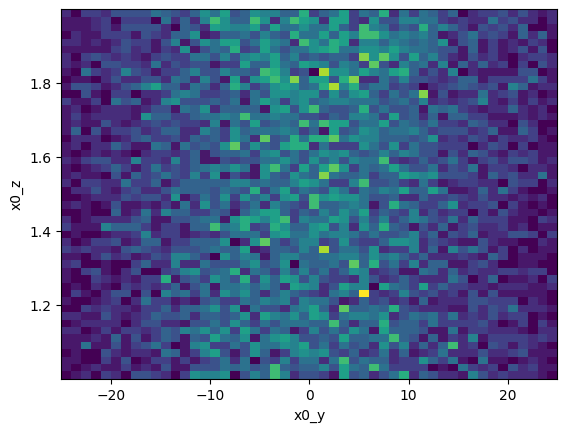

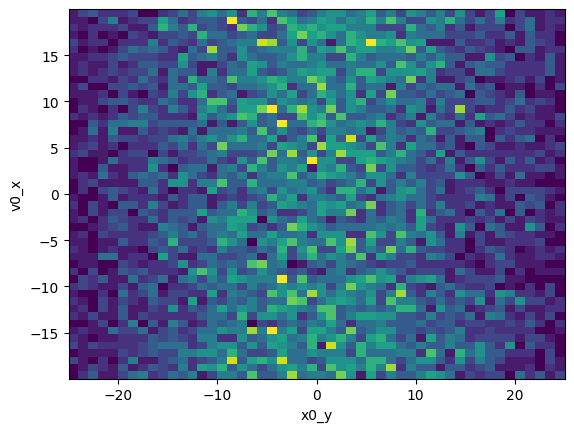

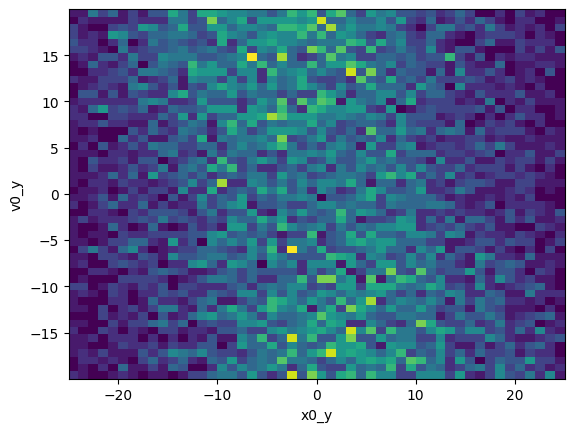

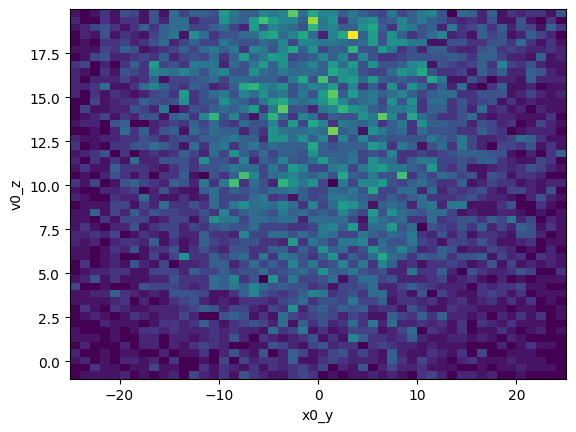

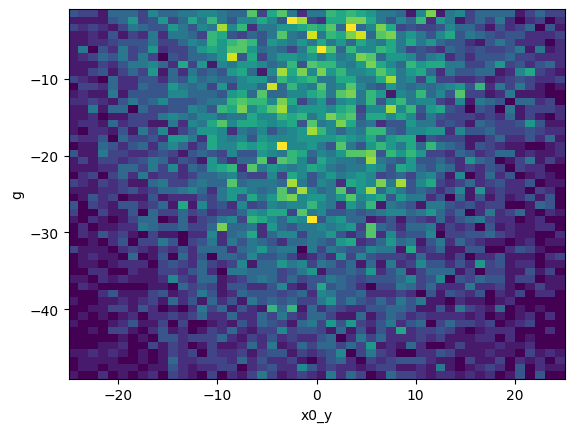

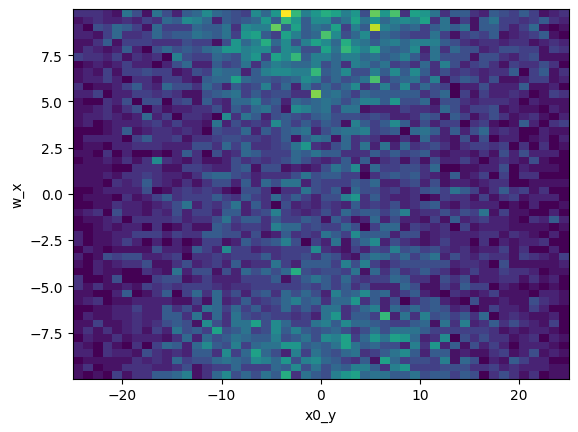

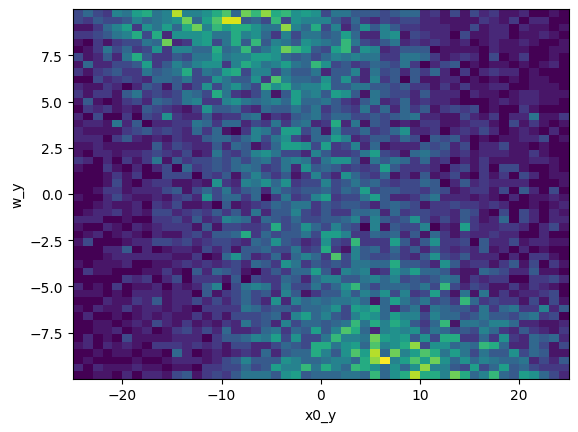

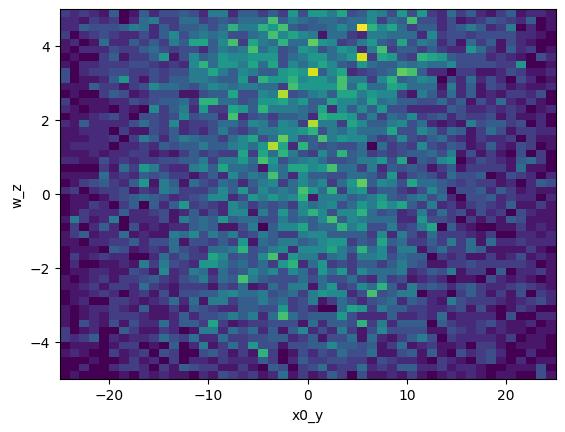

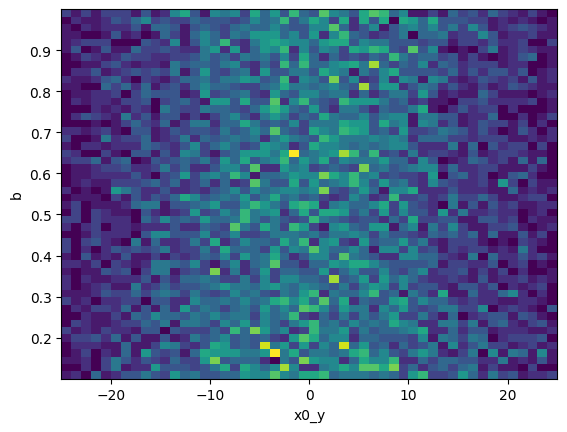

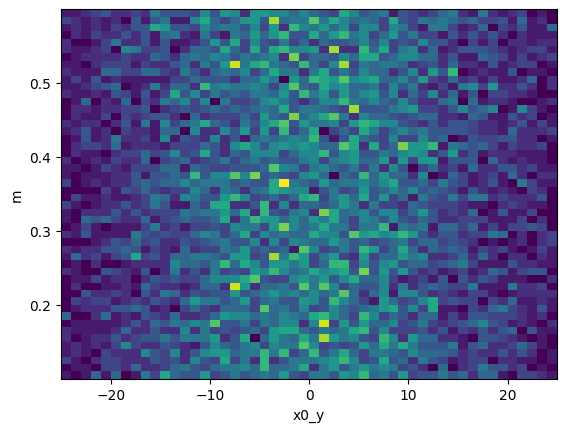

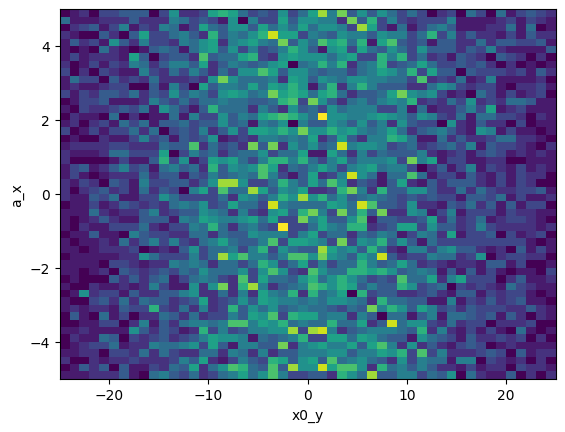

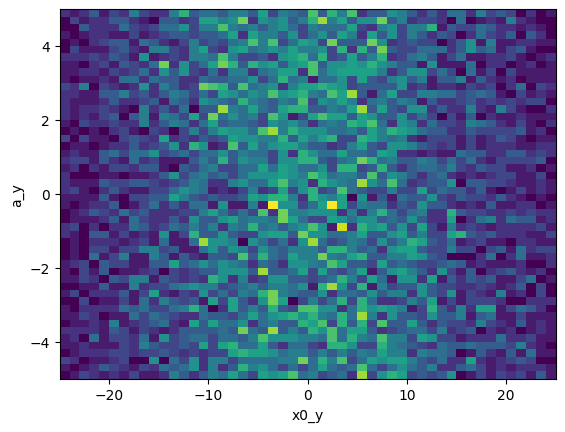

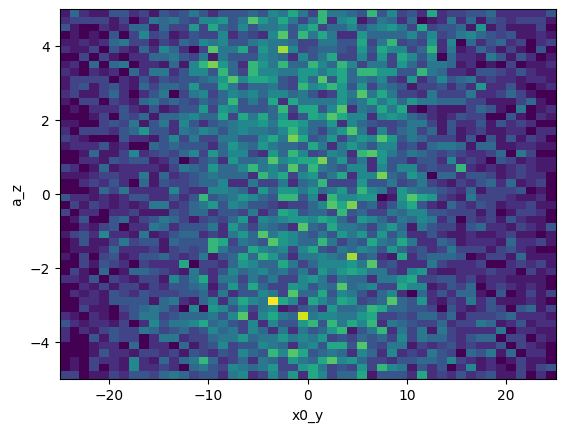

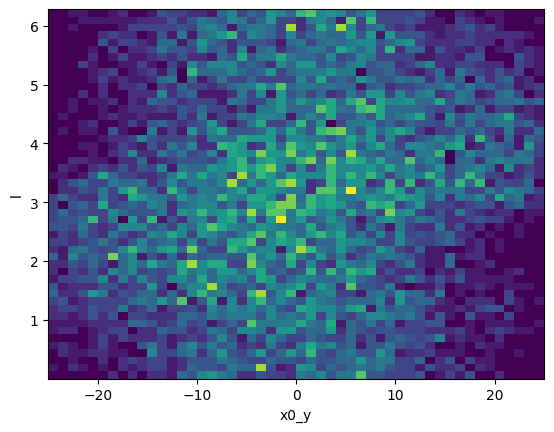

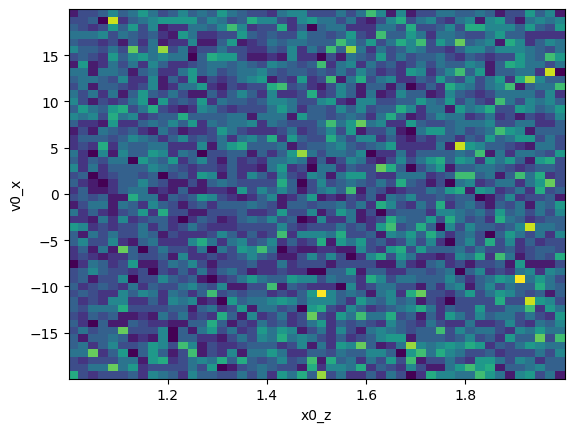

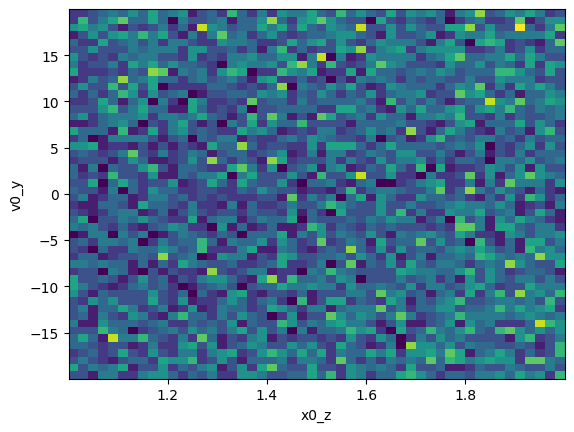

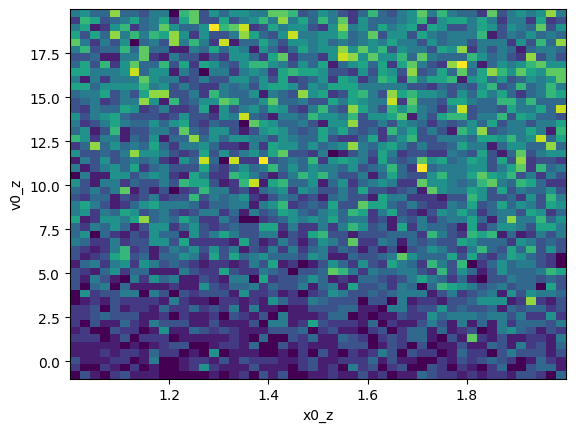

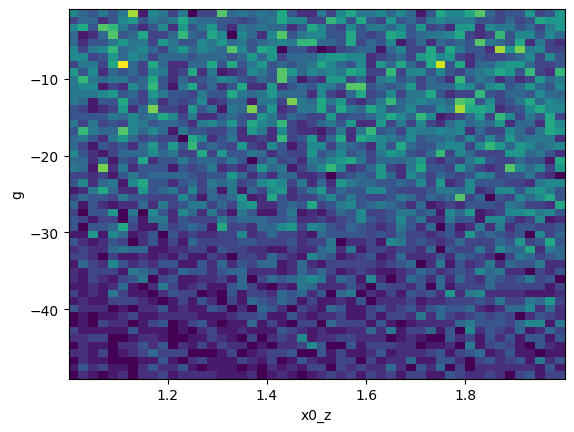

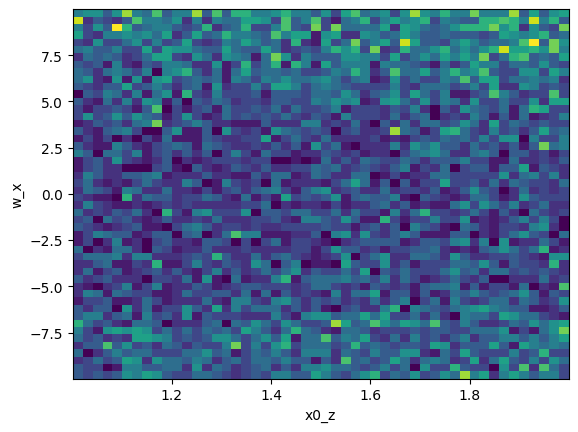

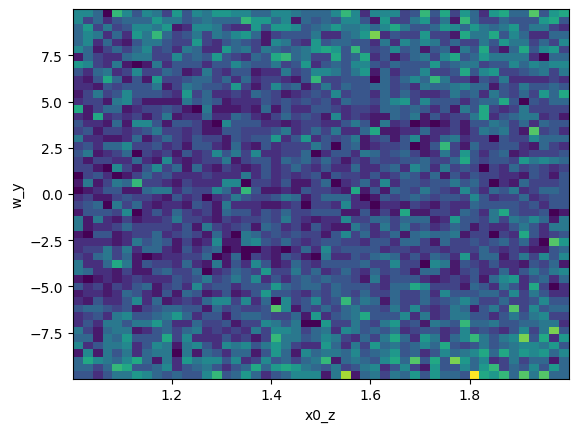

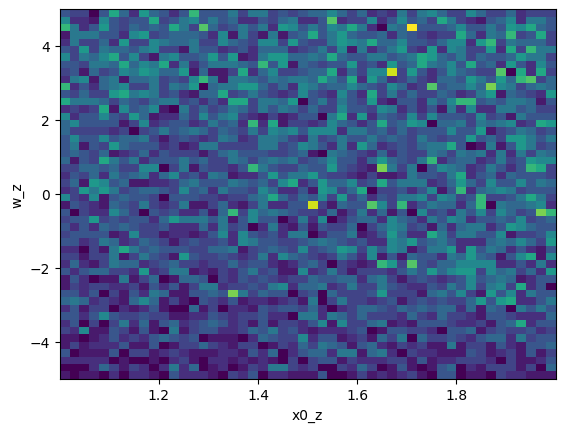

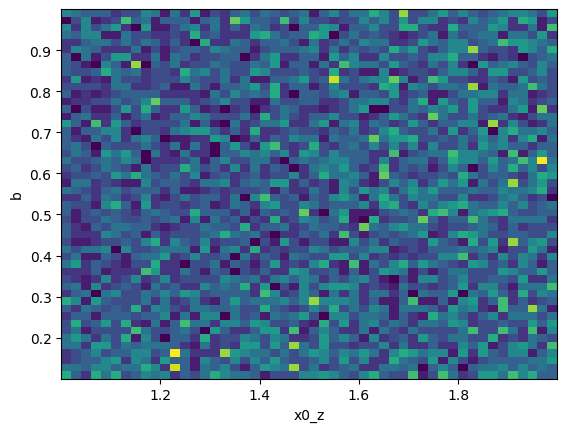

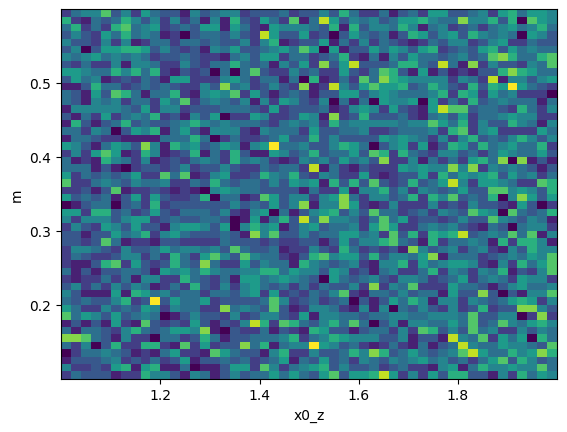

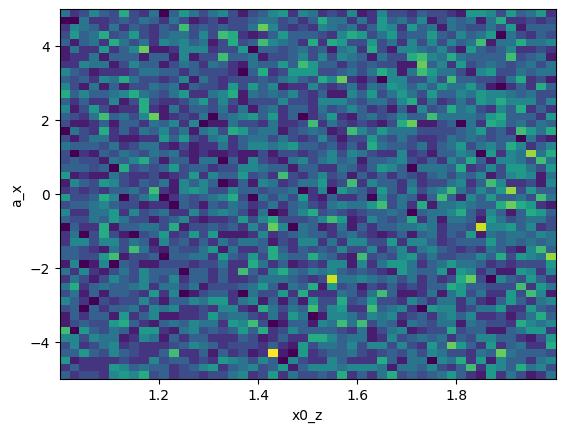

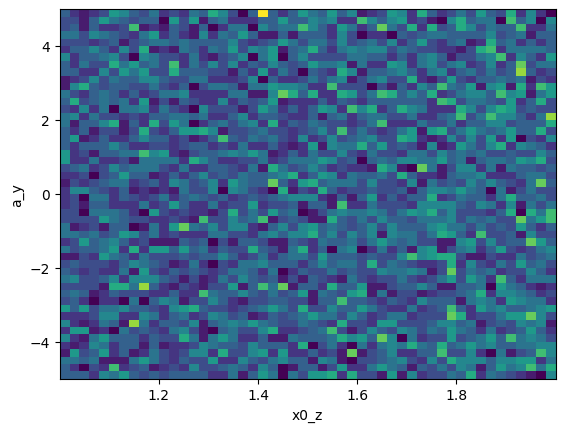

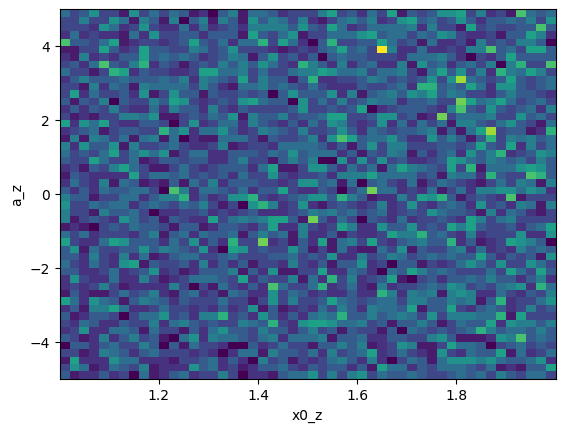

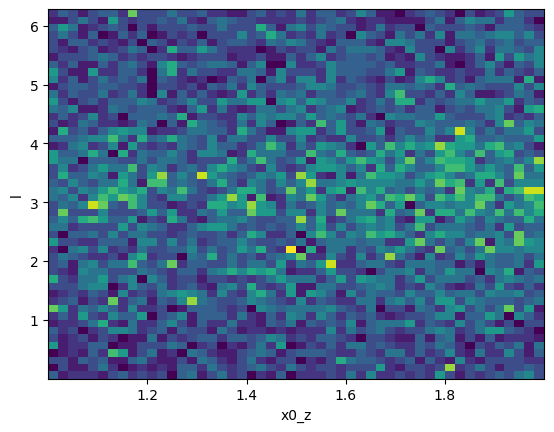

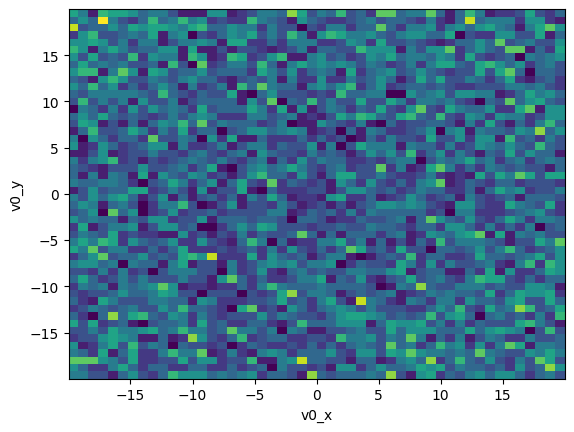

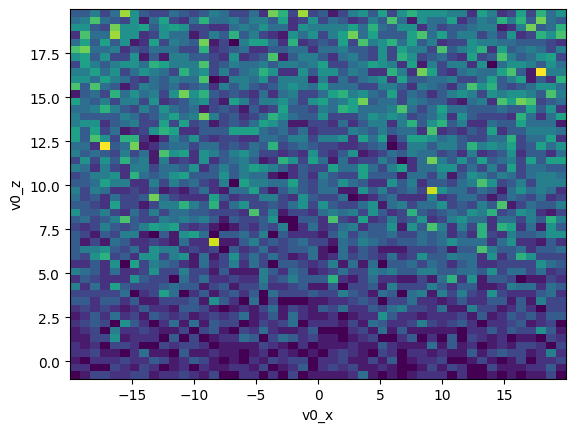

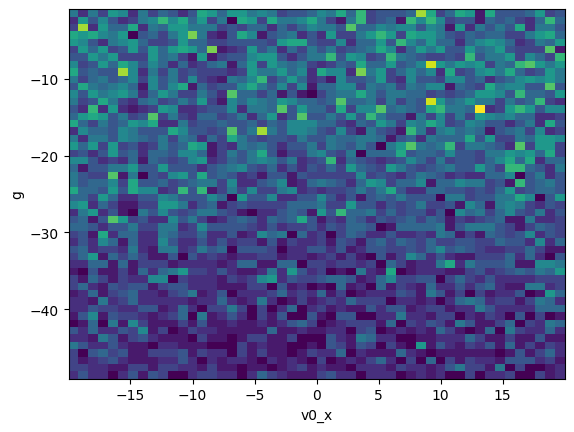

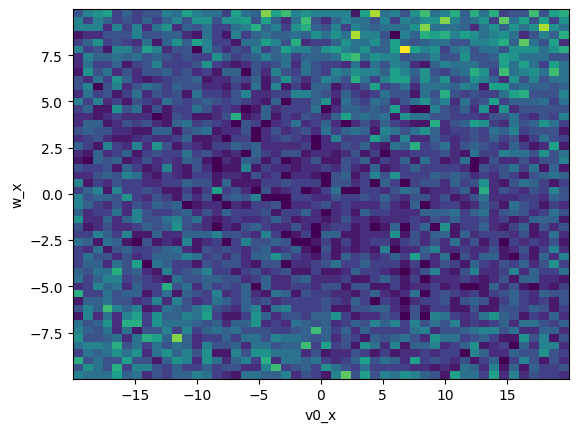

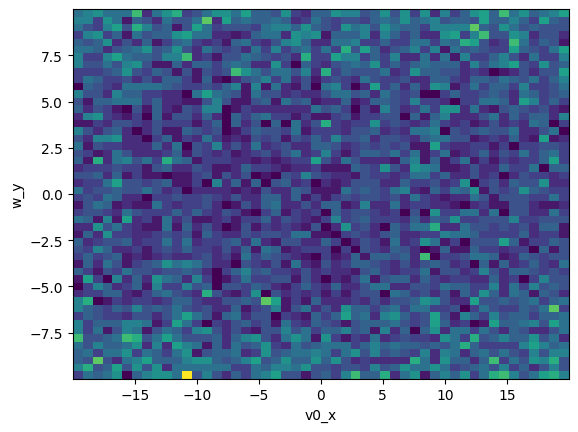

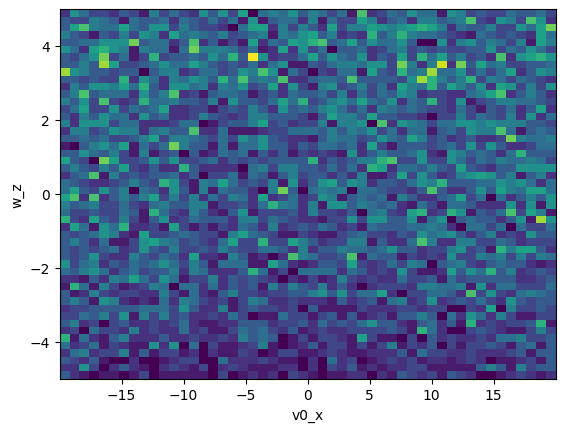

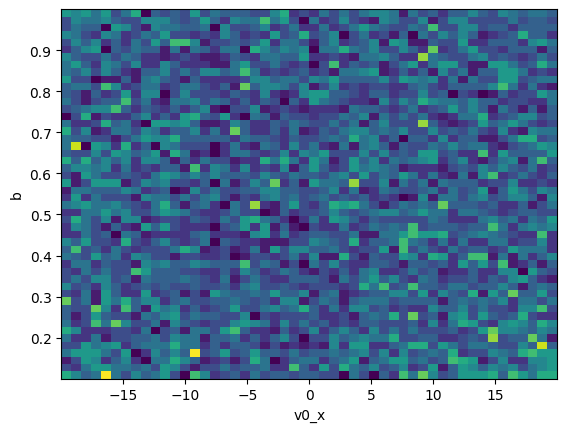

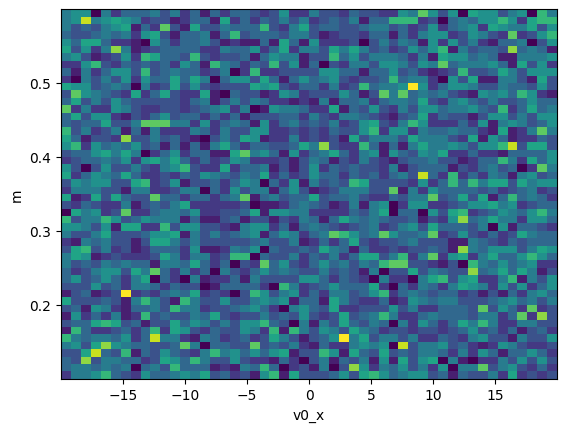

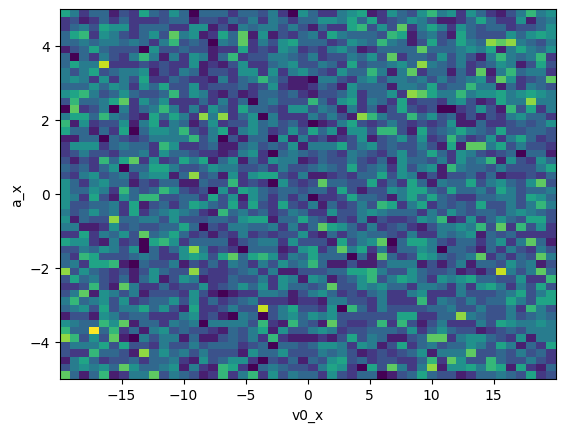

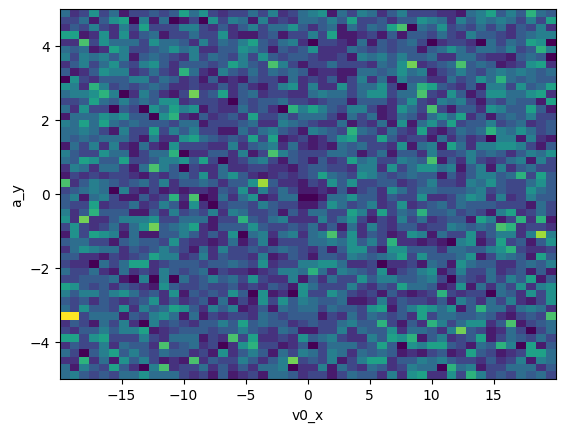

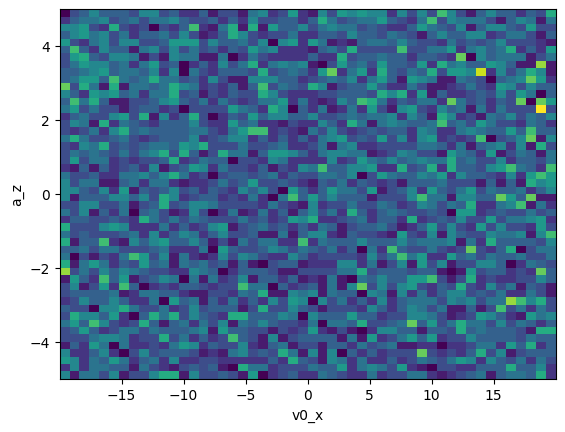

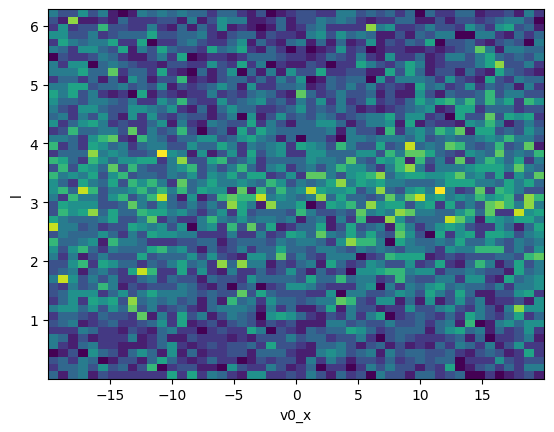

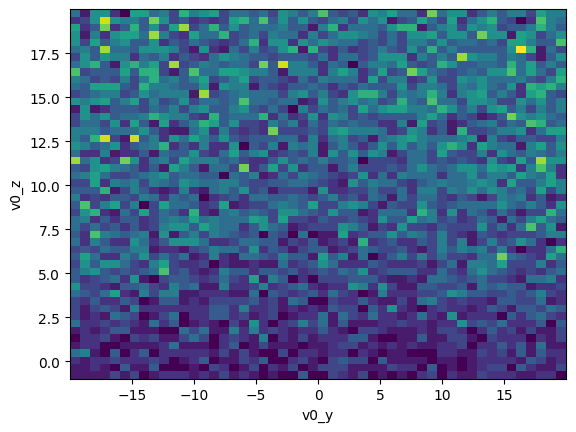

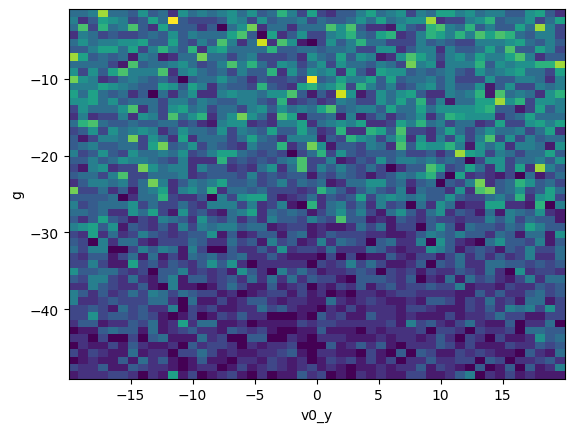

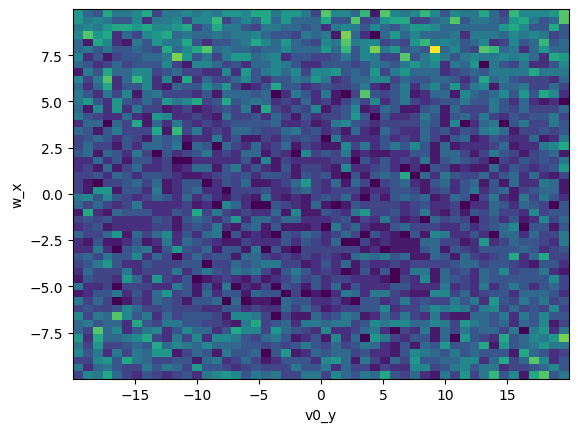

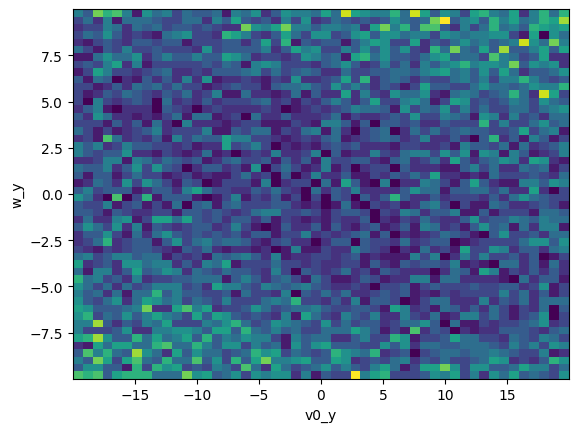

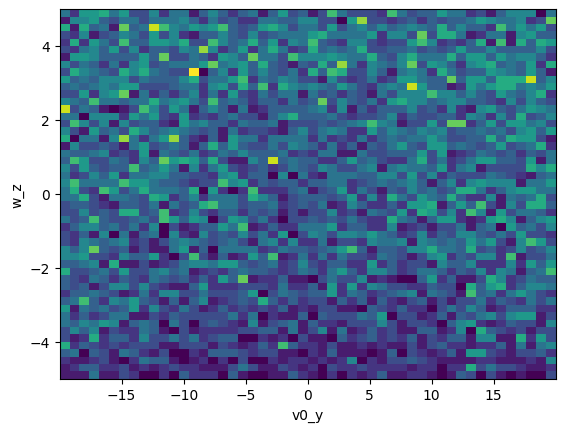

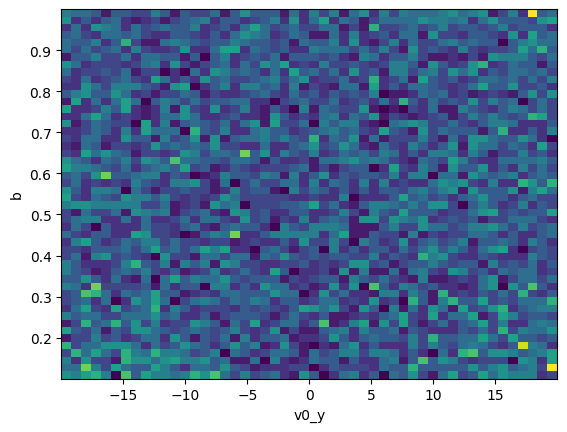

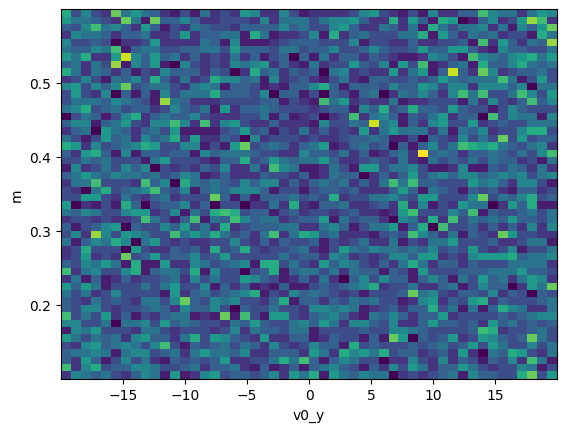

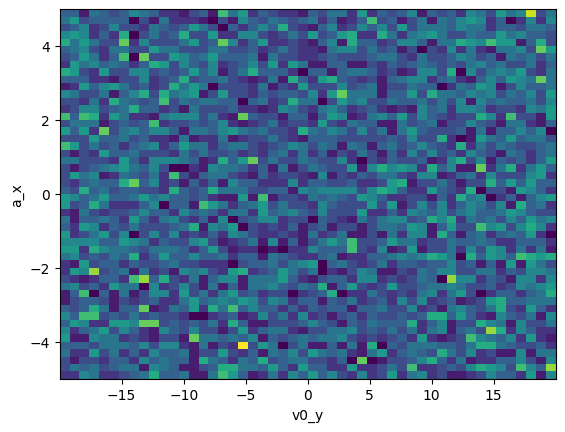

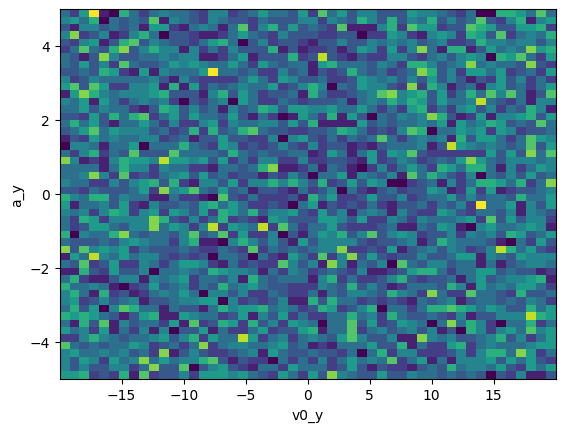

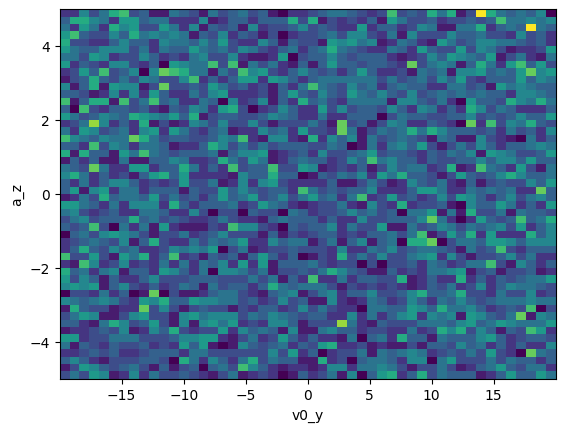

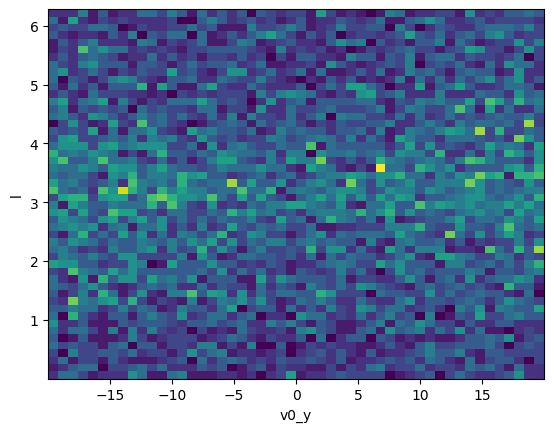

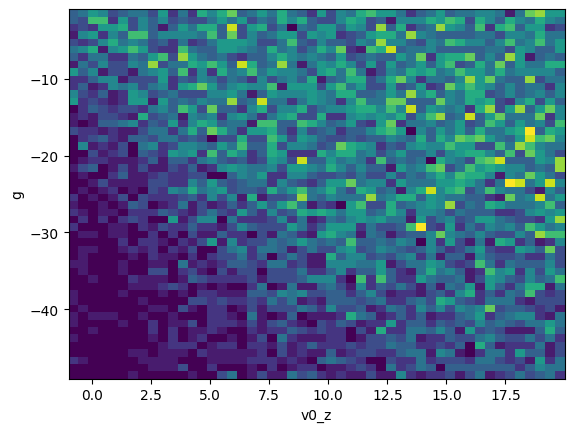

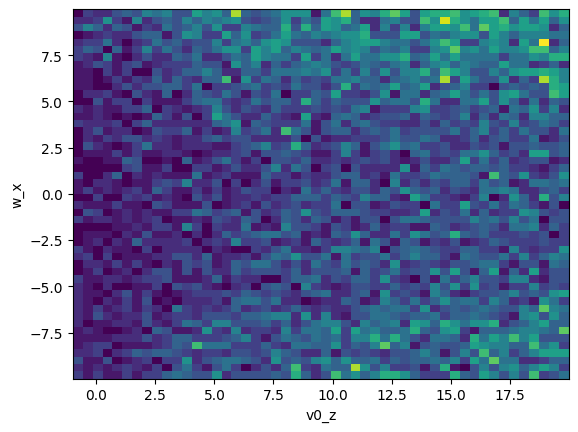

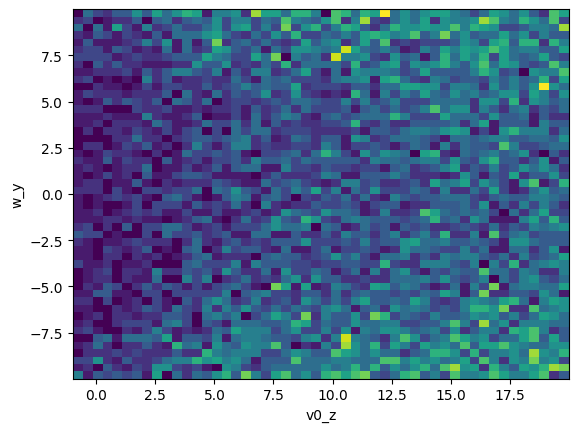

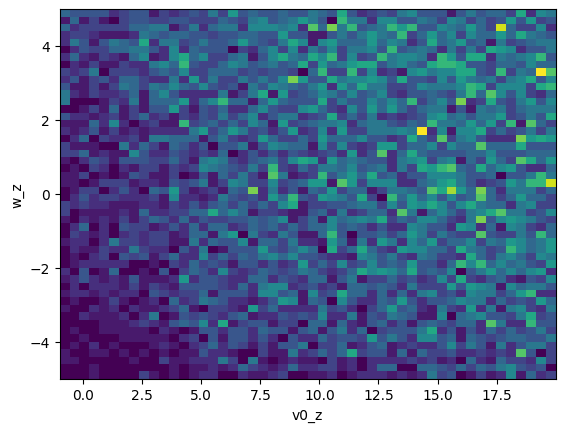

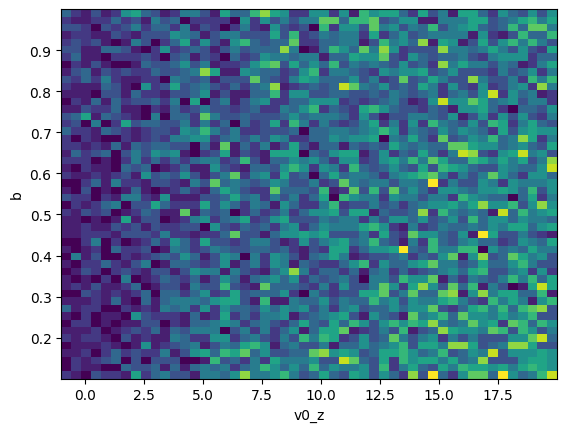

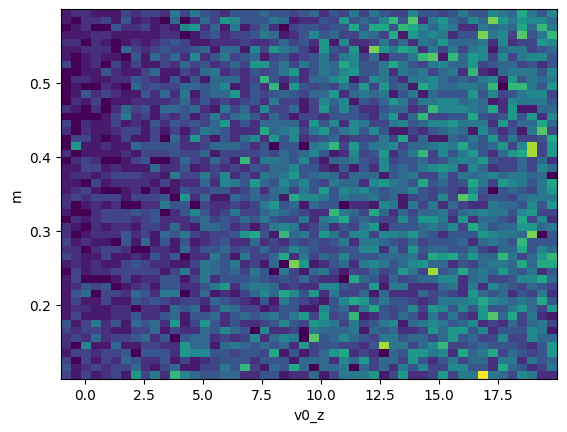

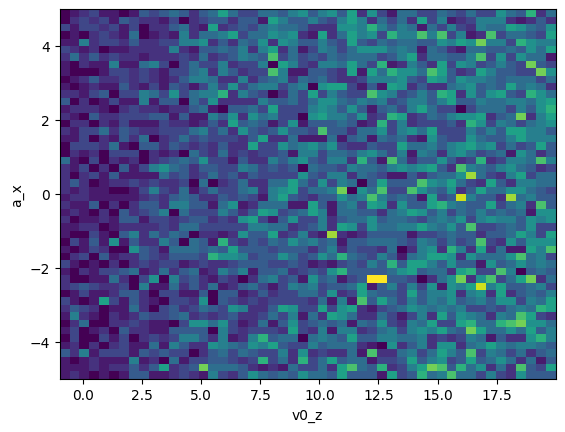

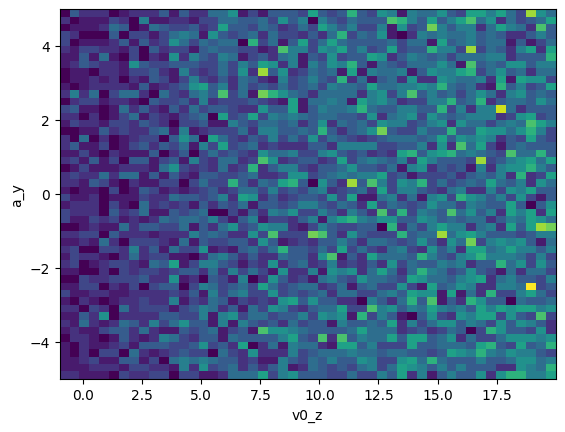

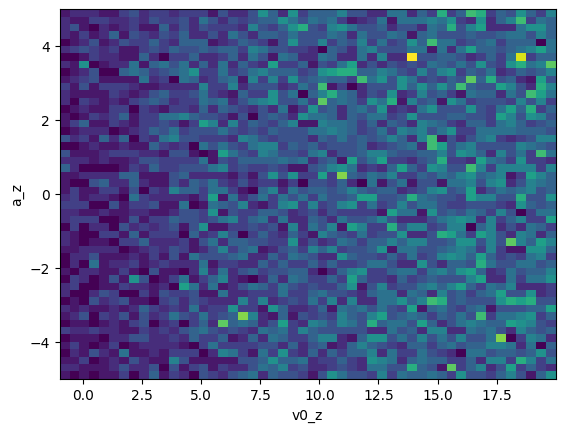

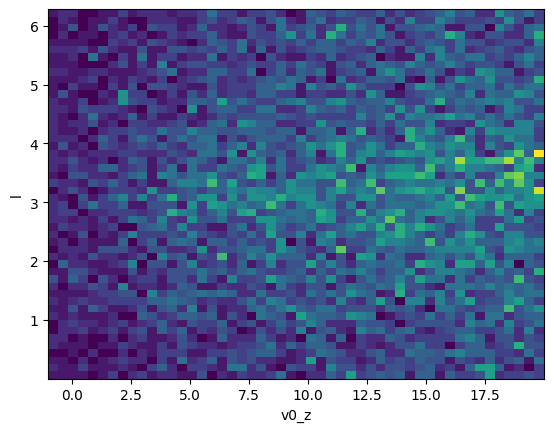

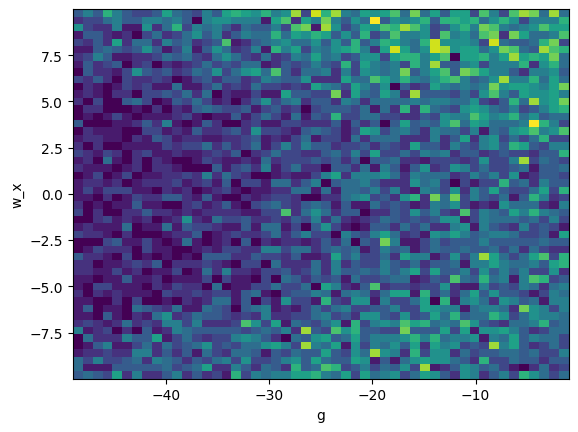

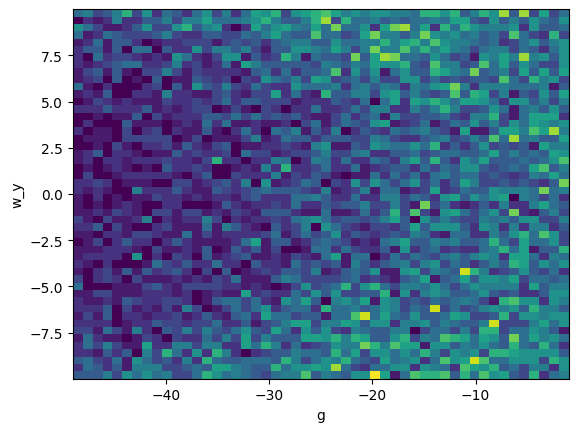

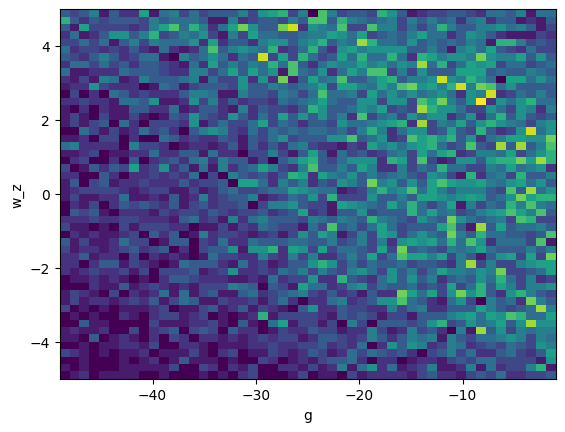

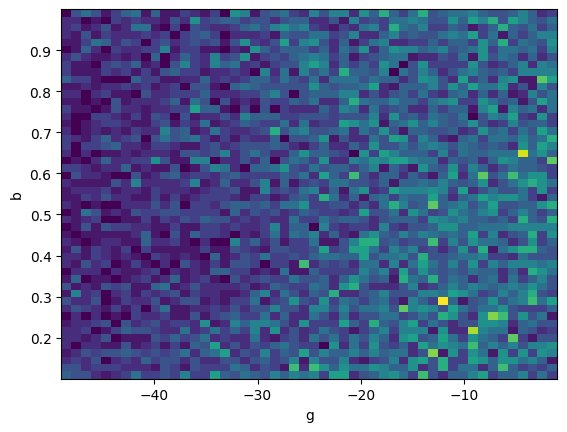

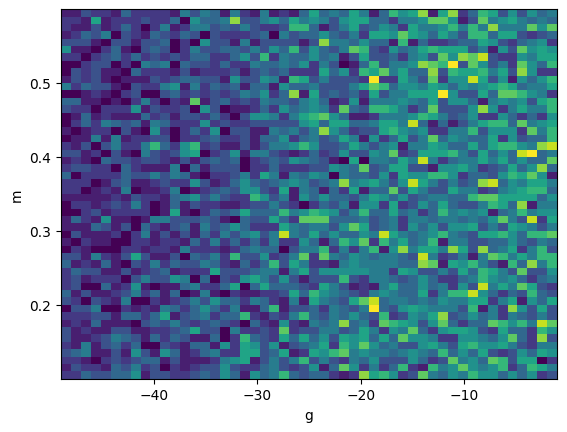

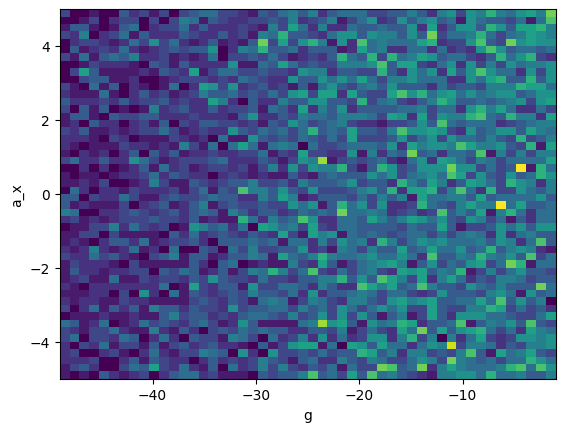

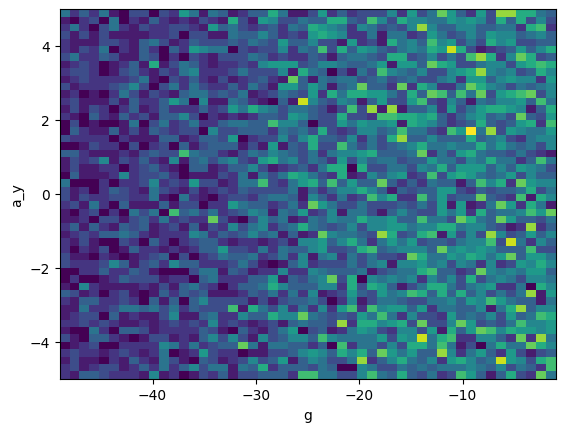

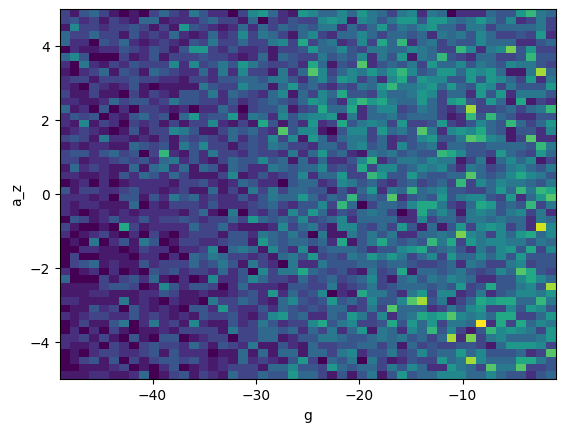

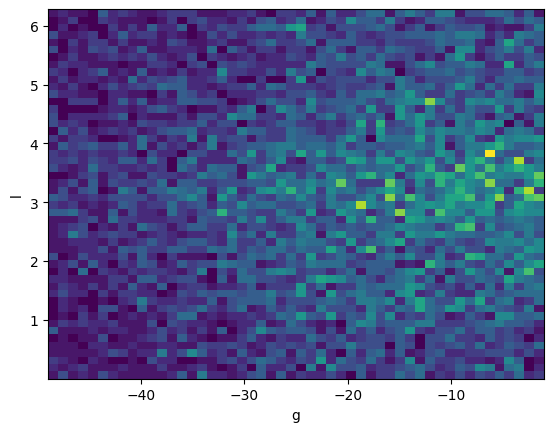

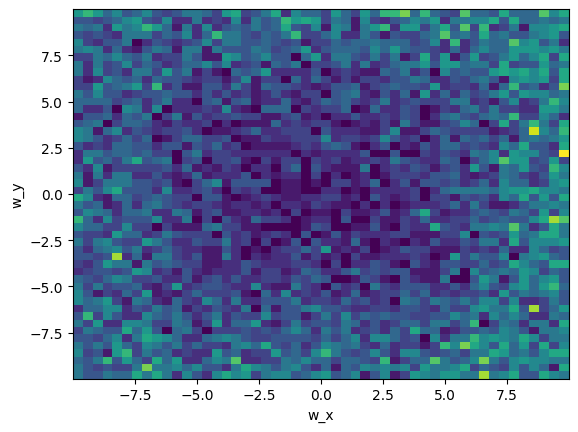

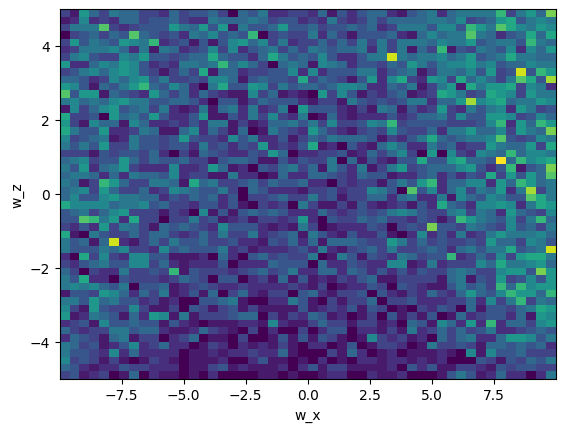

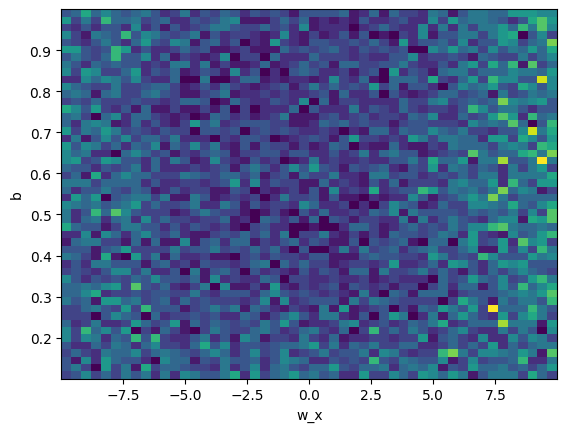

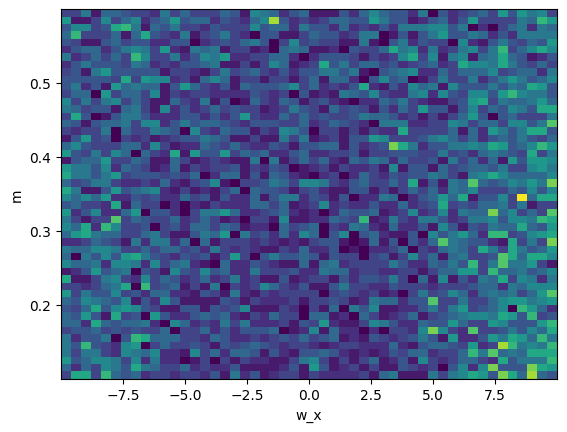

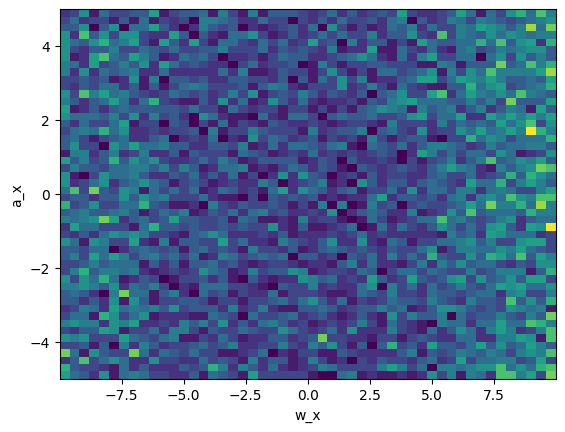

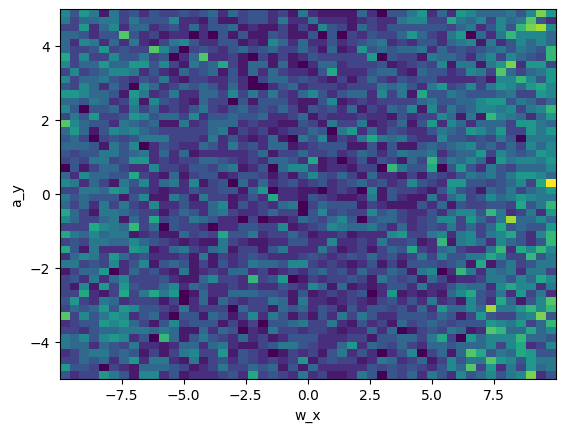

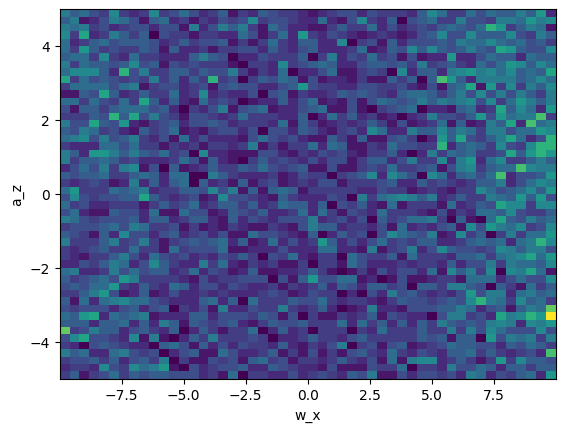

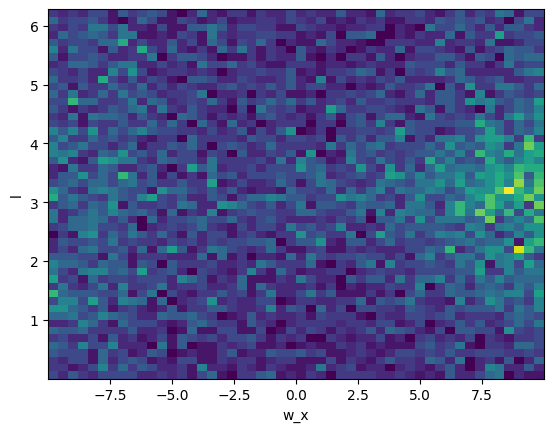

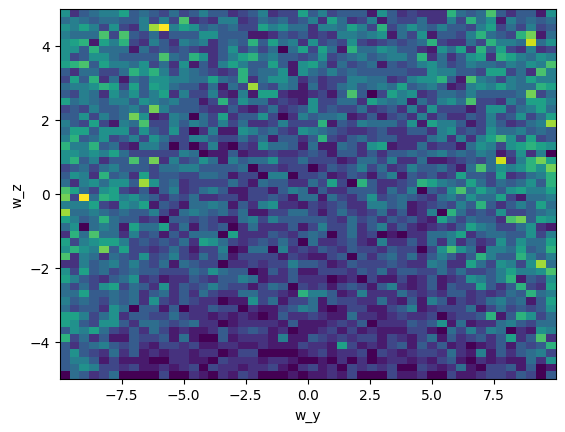

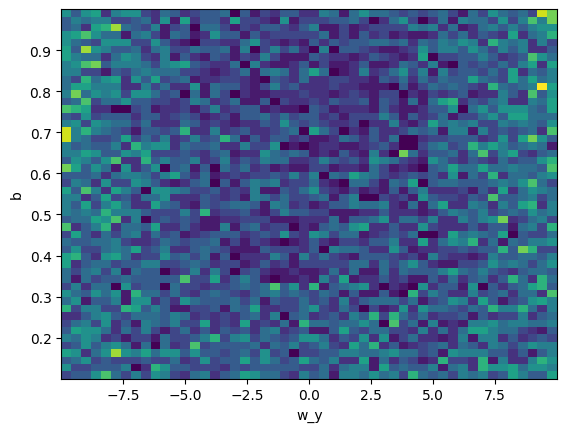

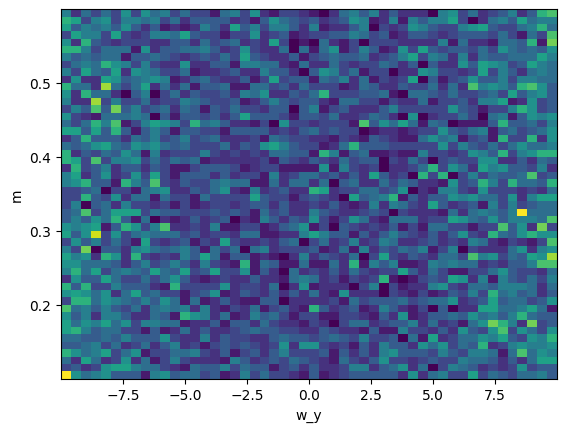

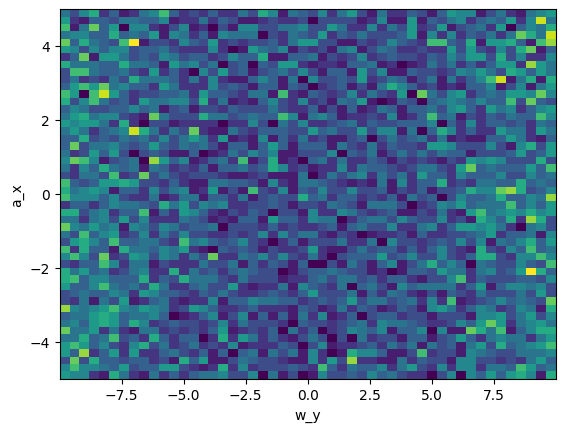

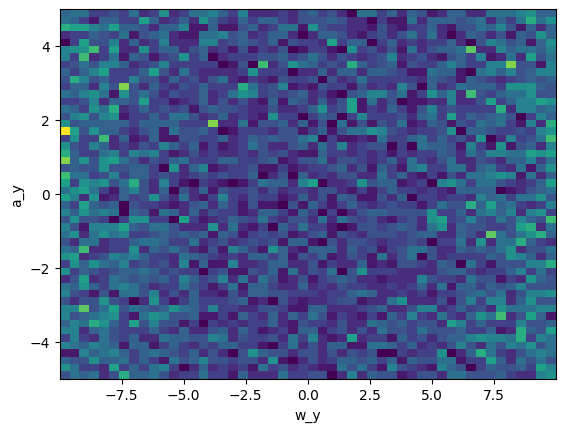

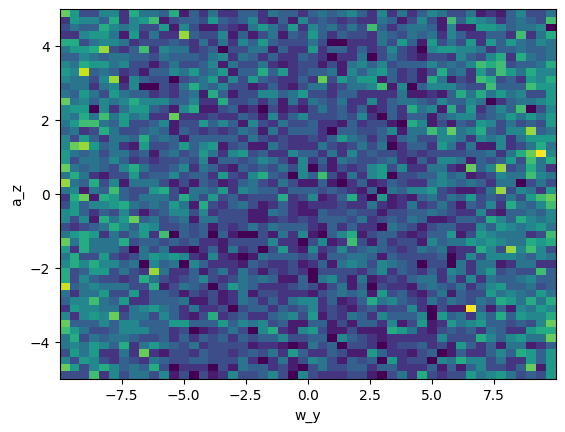

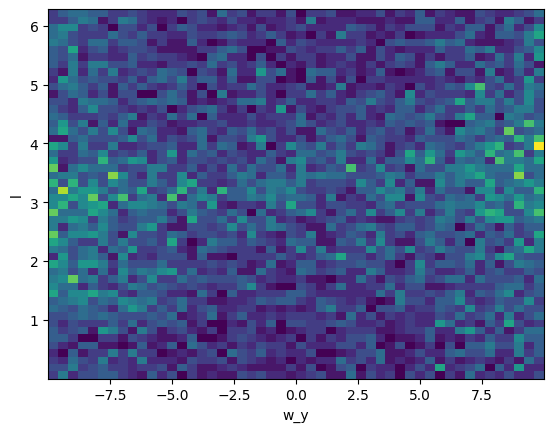

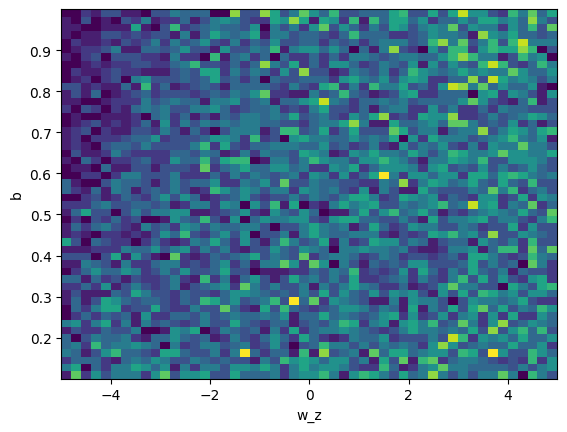

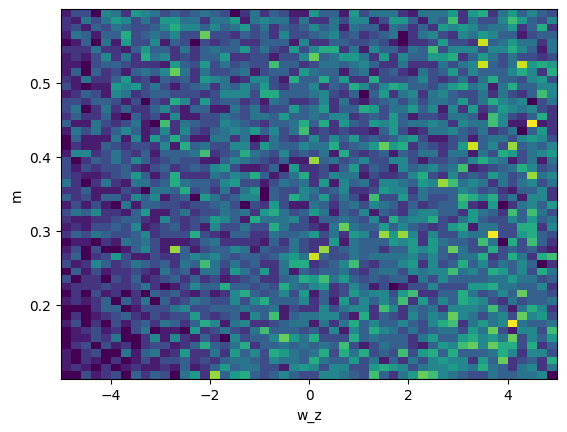

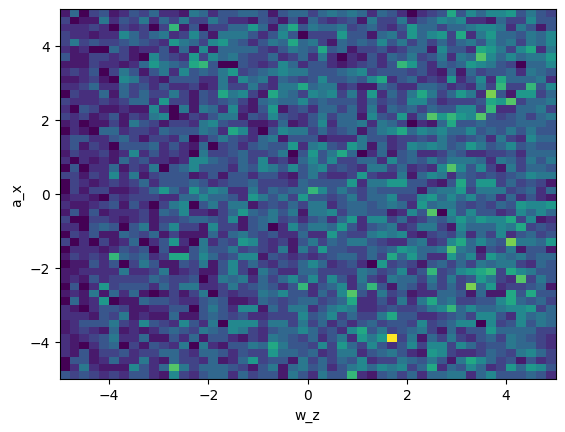

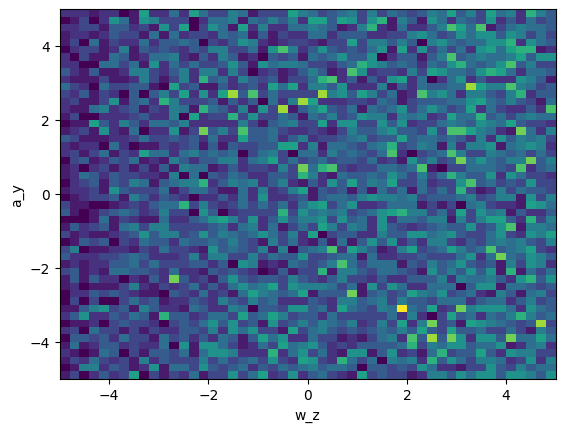

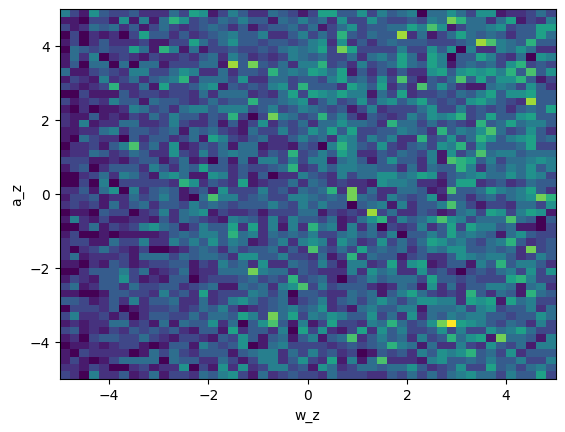

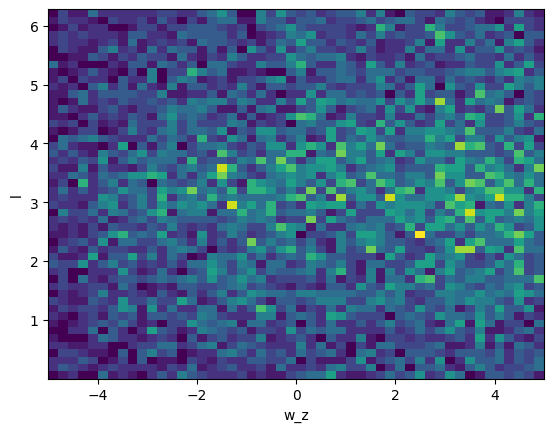

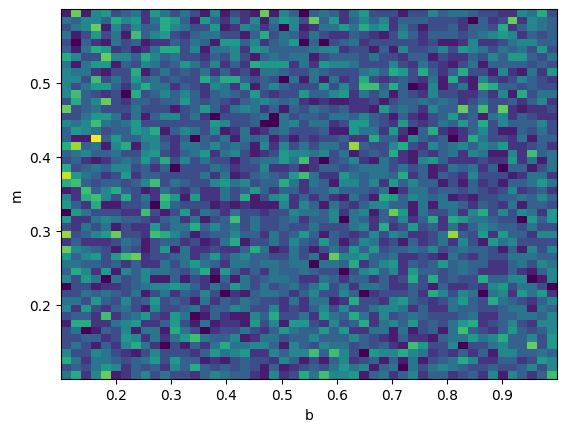

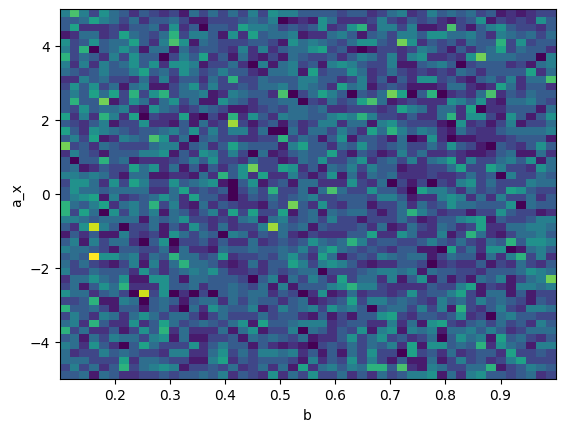

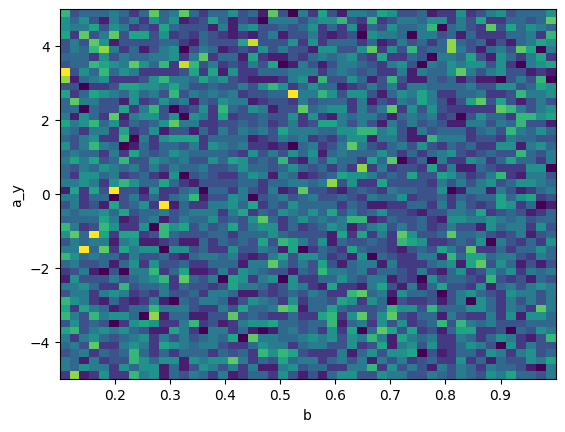

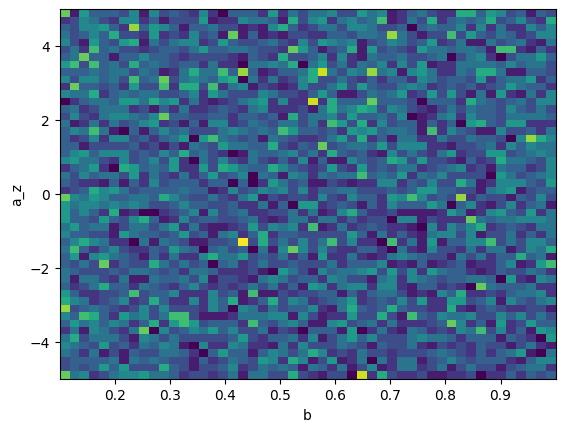

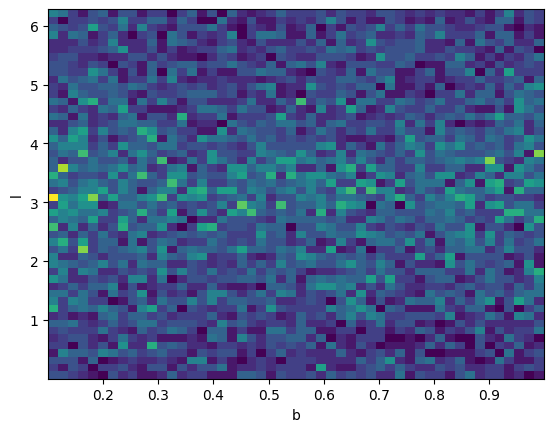

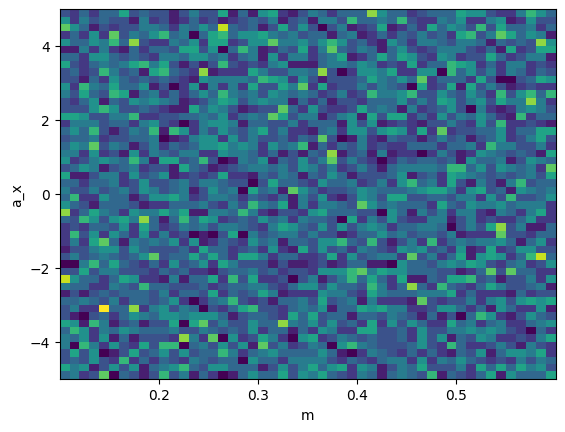

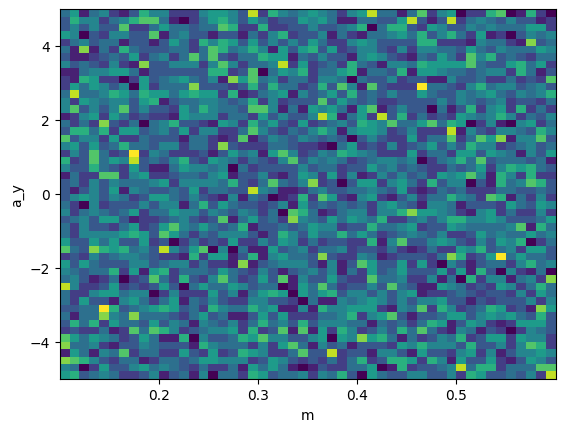

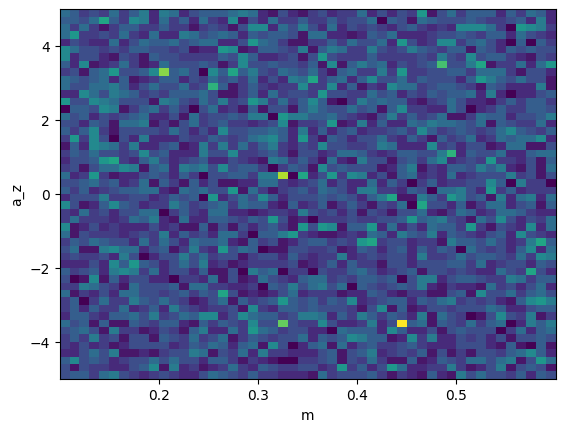

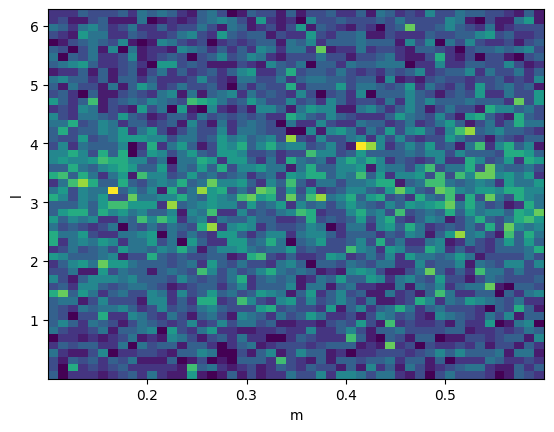

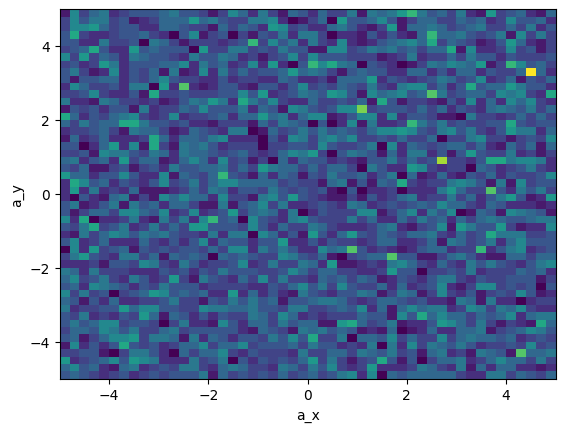

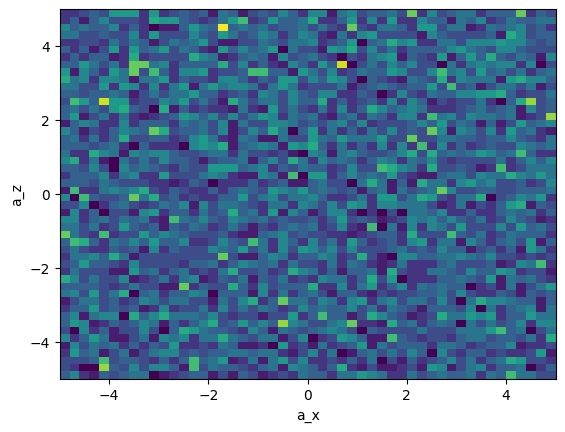

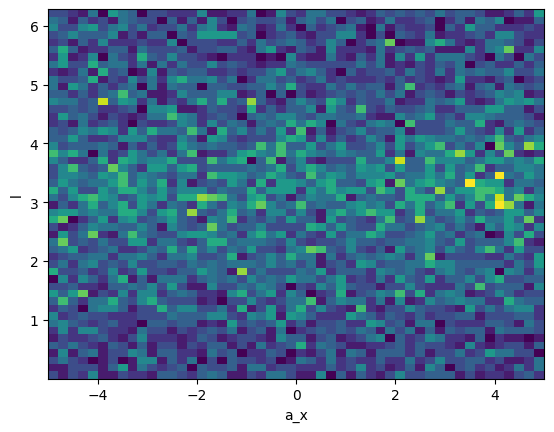

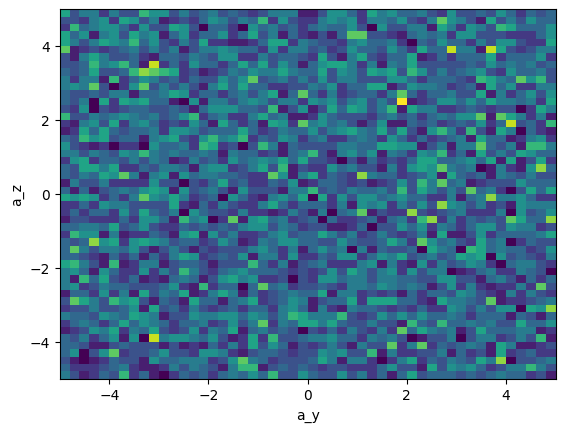

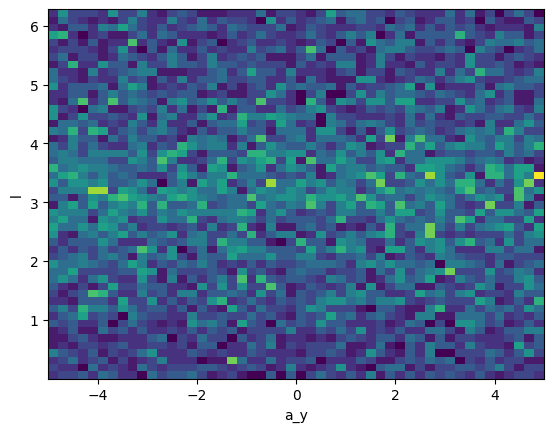

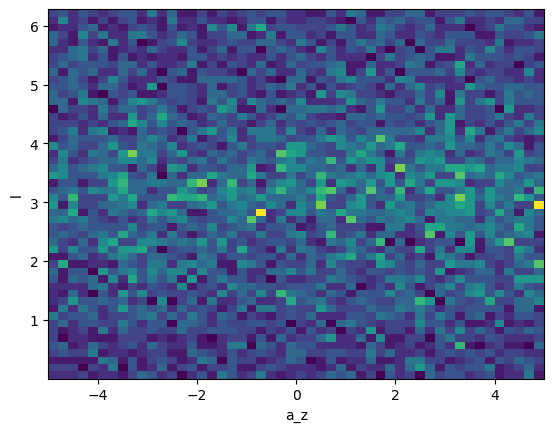

In [53]:
# plot 2d hist of all pairs
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.hist2d(df.iloc[:, i], df.iloc[:, j], bins=50)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

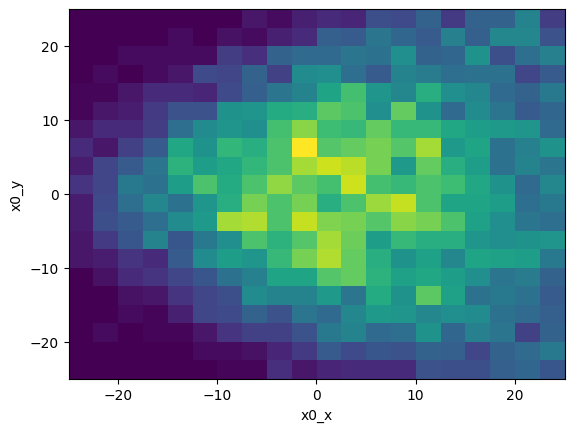

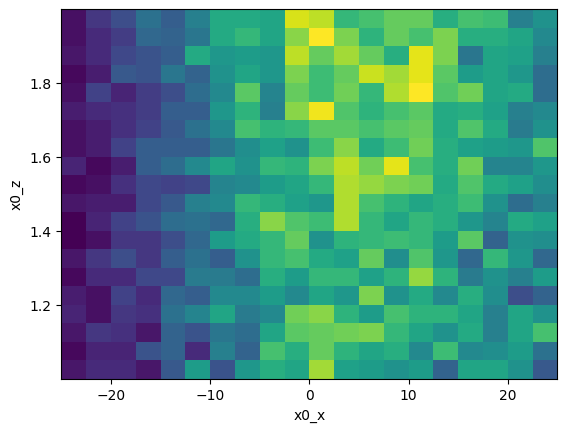

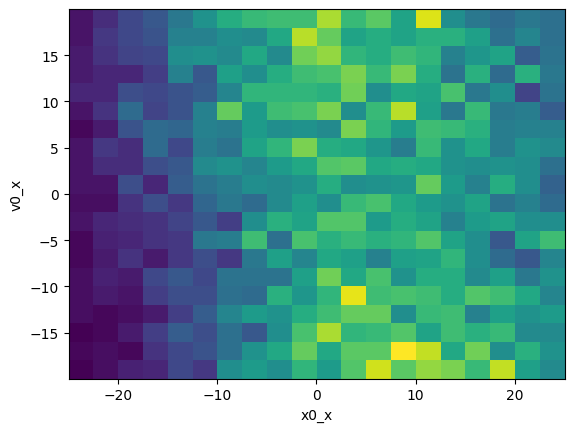

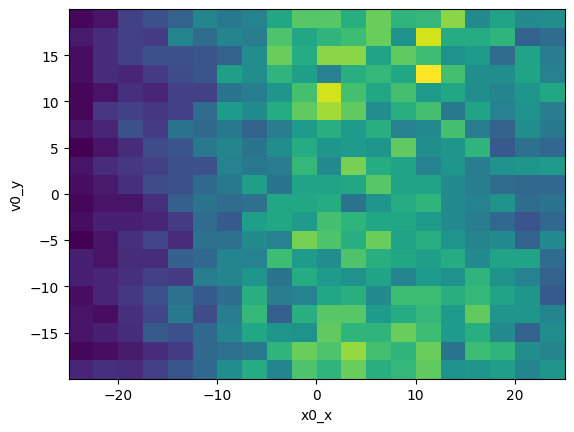

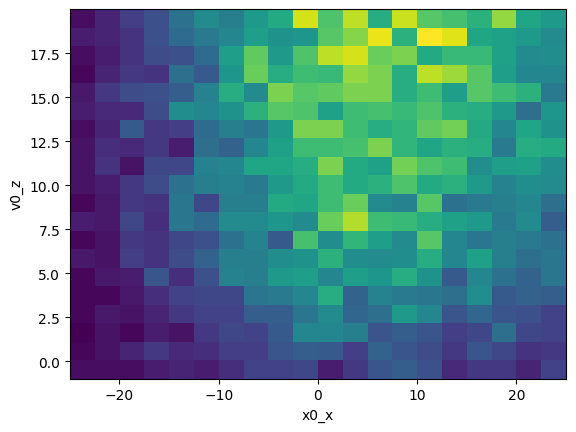

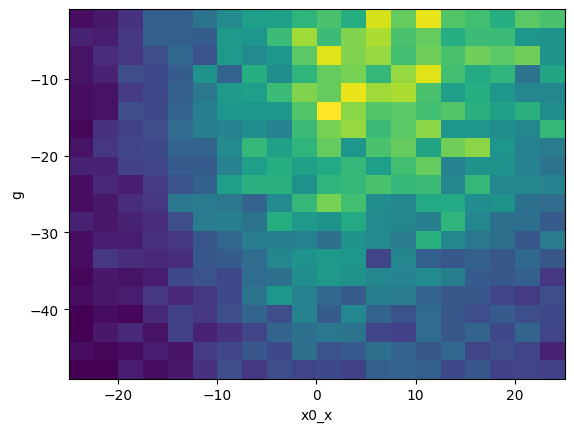

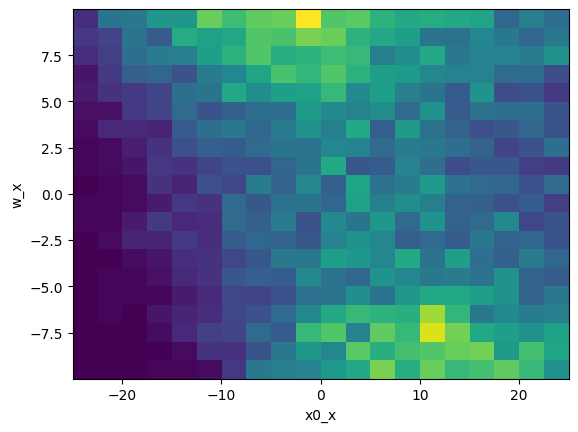

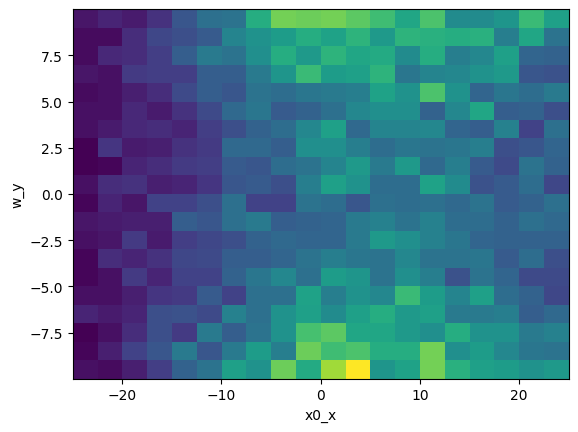

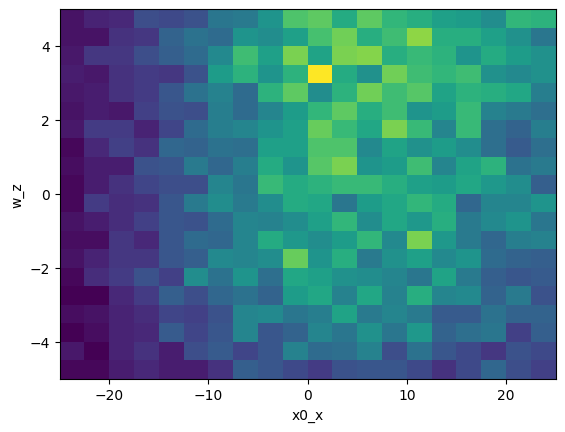

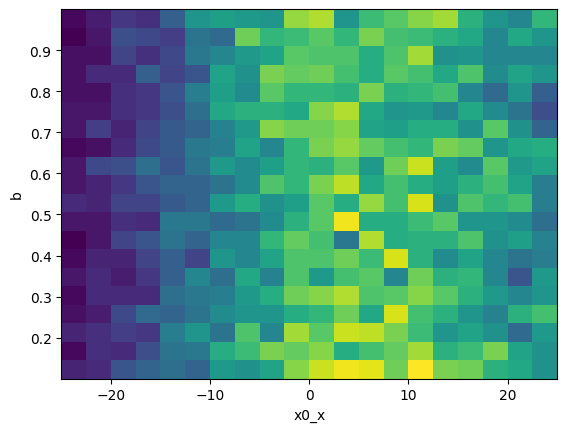

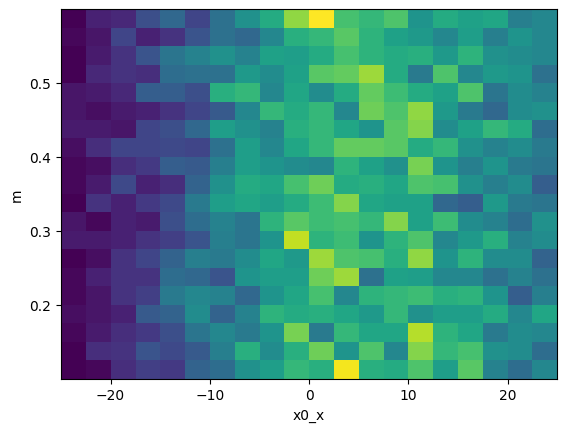

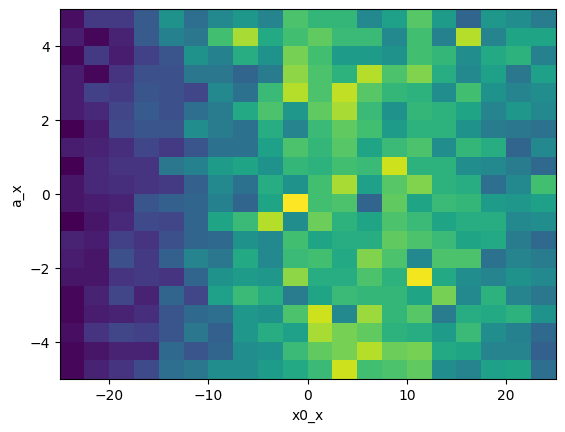

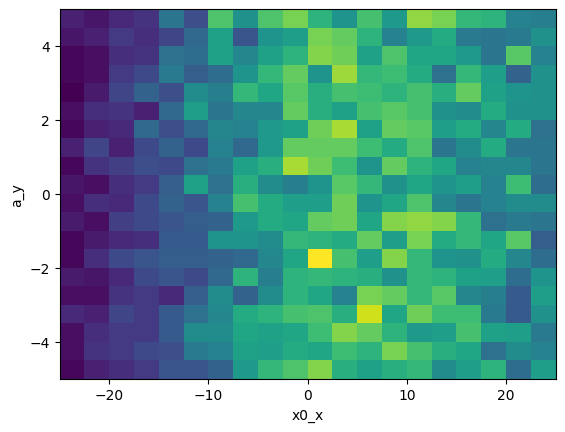

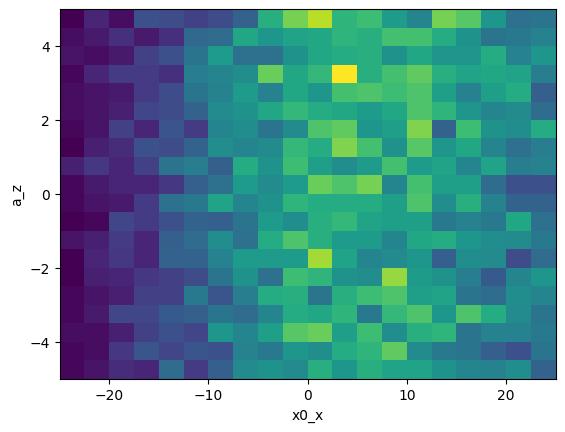

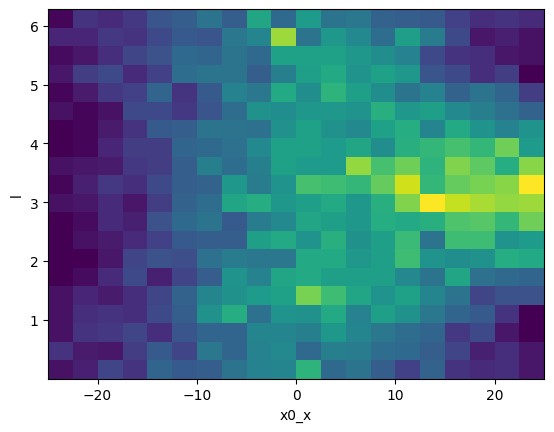

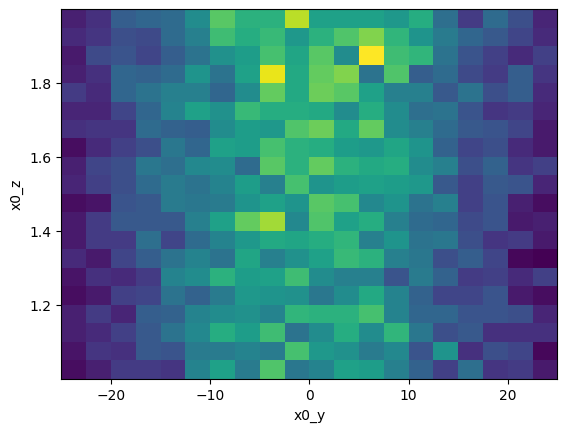

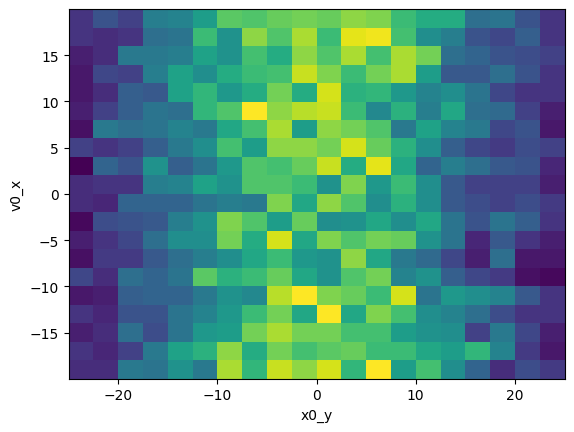

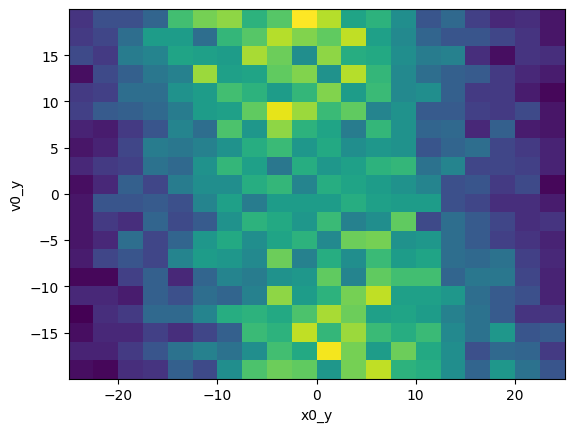

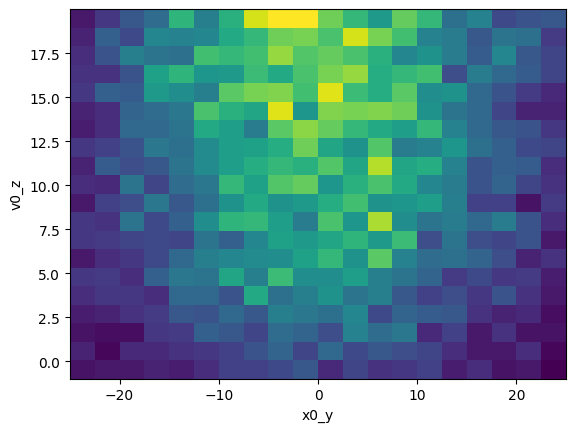

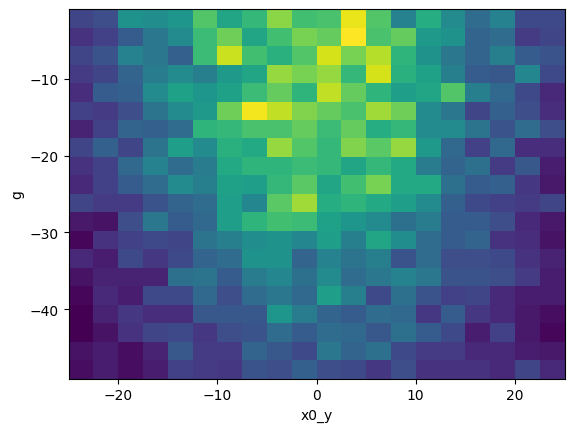

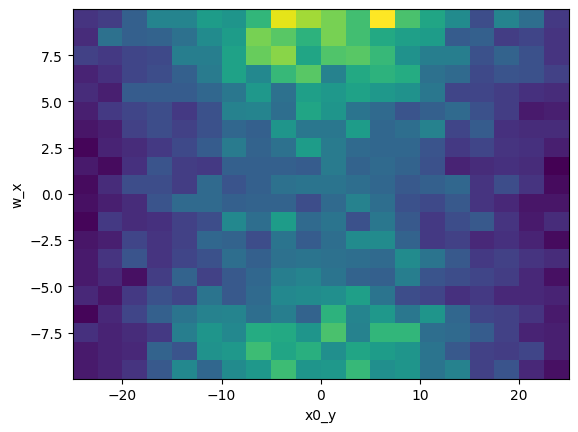

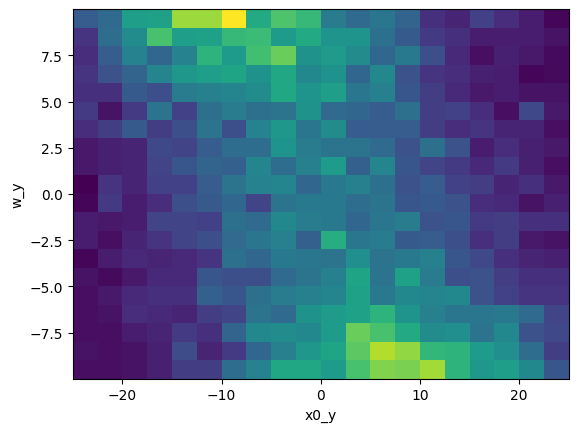

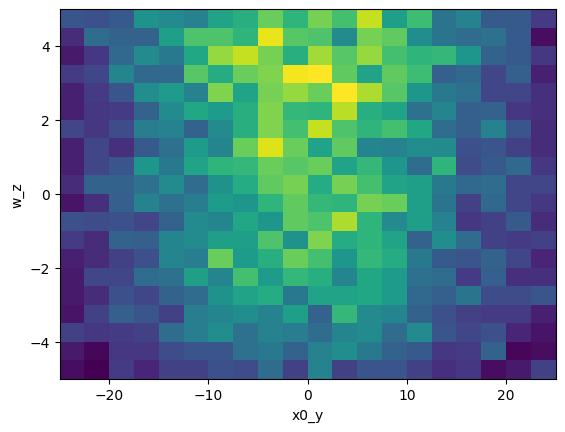

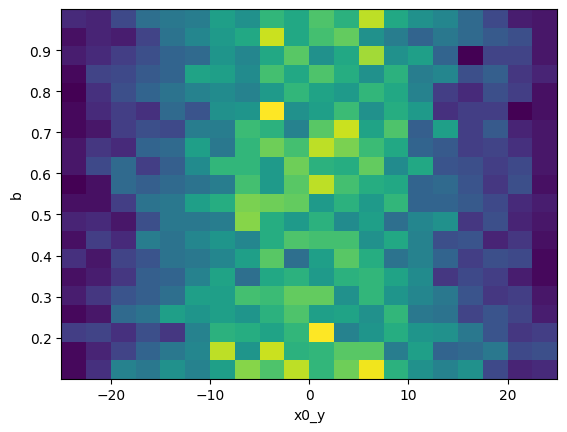

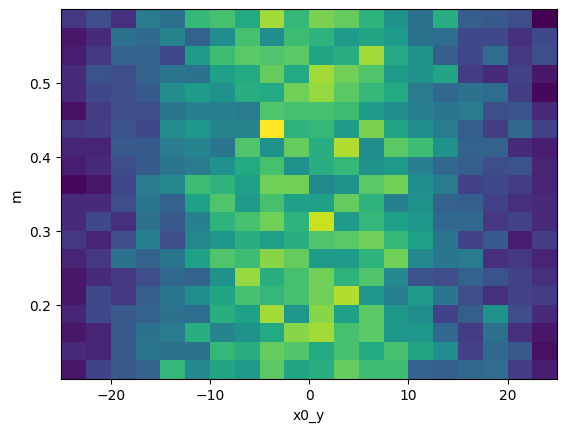

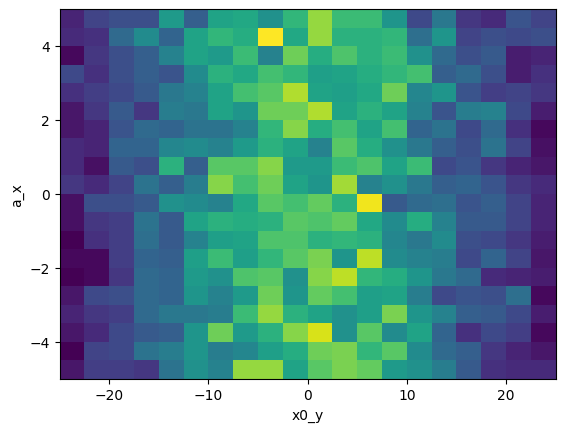

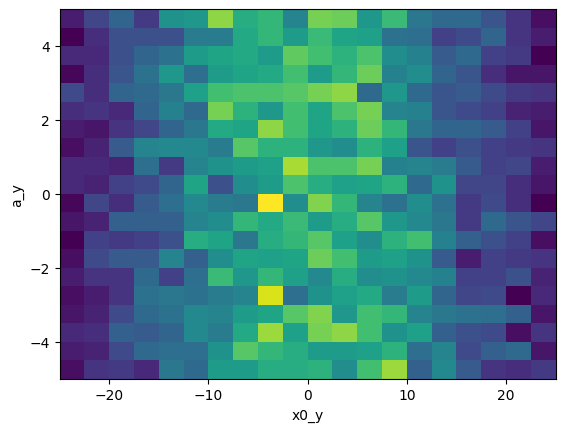

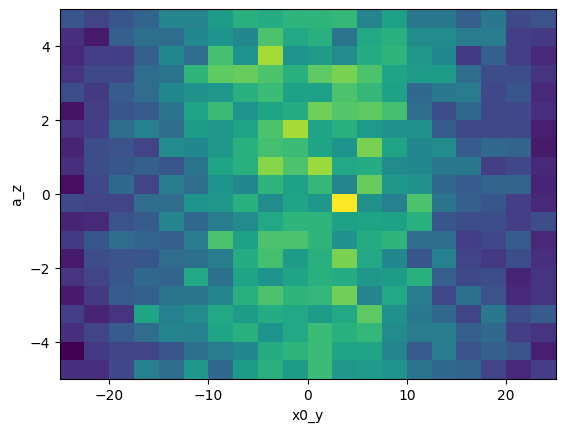

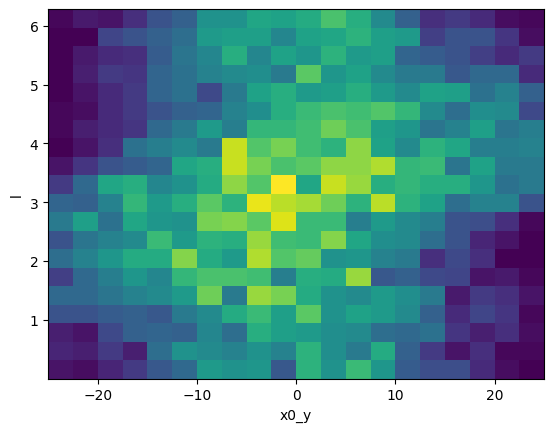

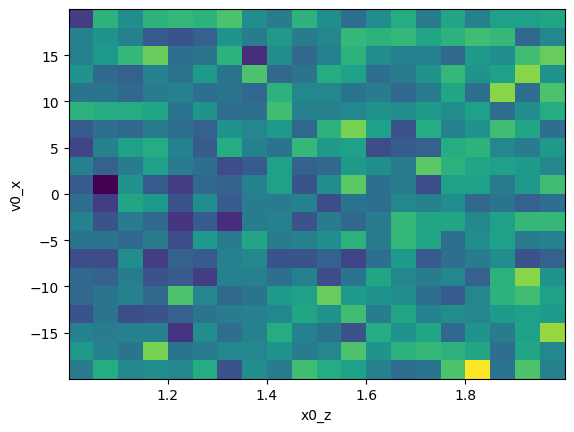

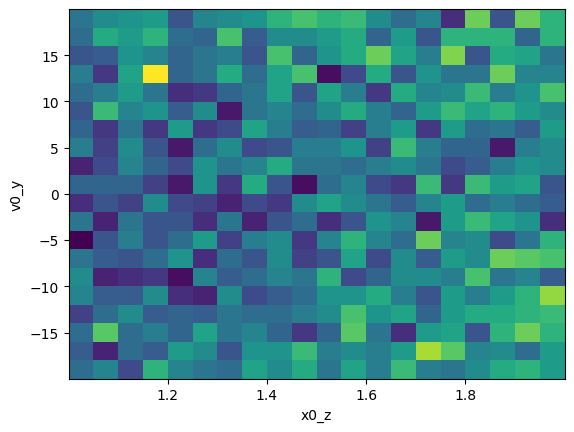

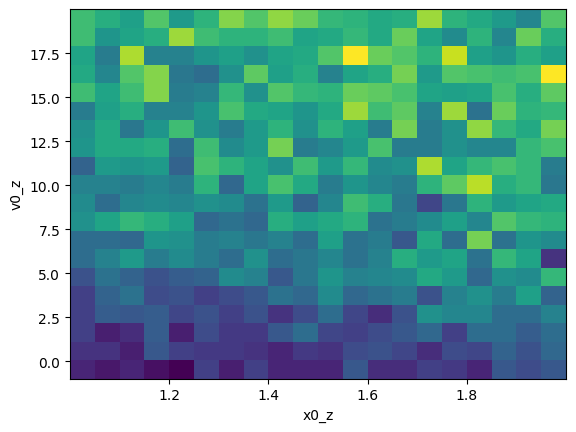

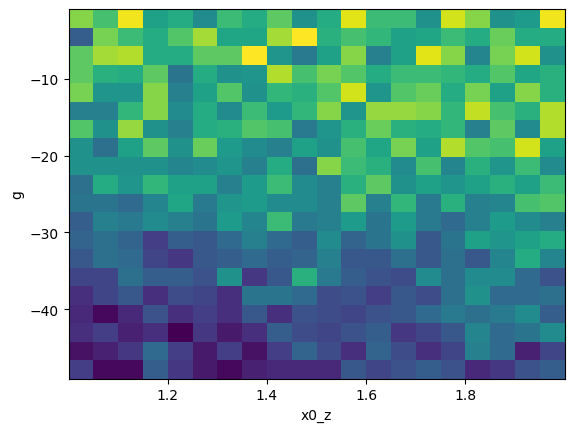

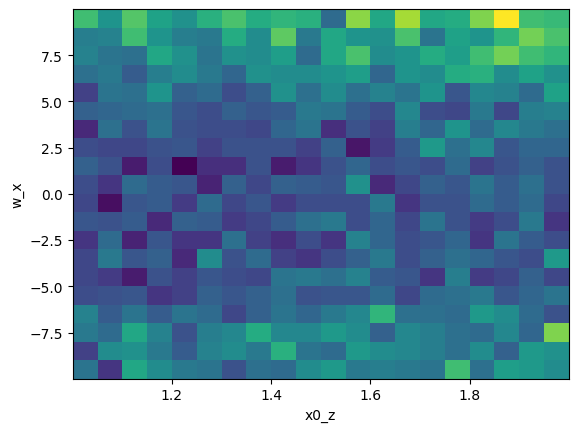

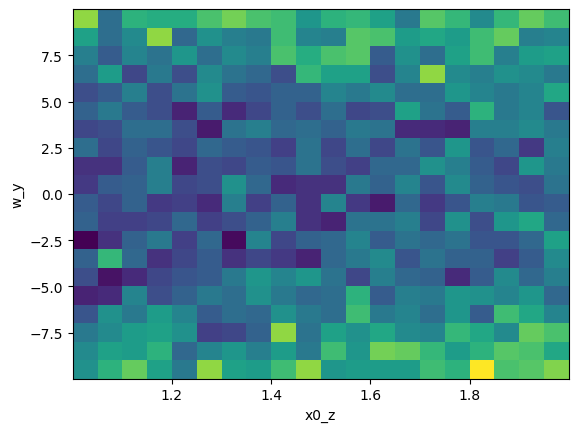

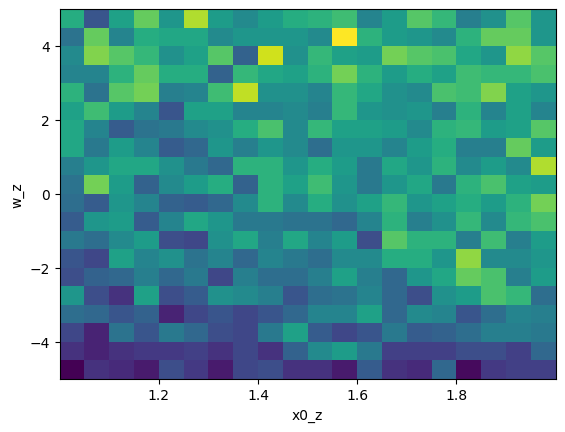

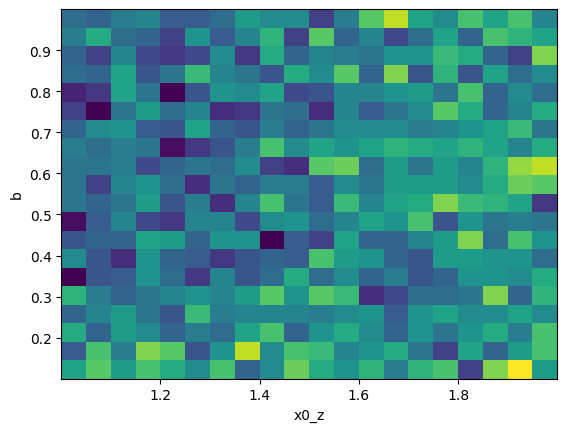

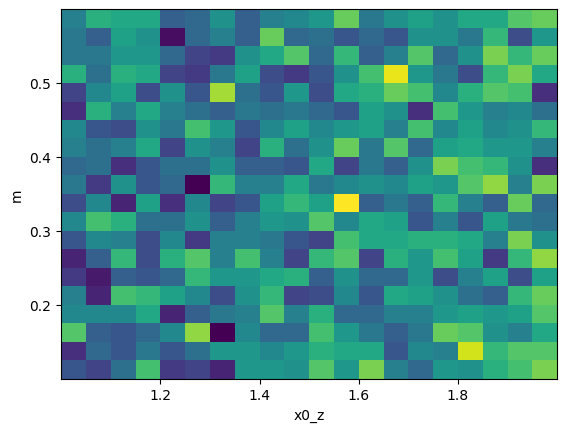

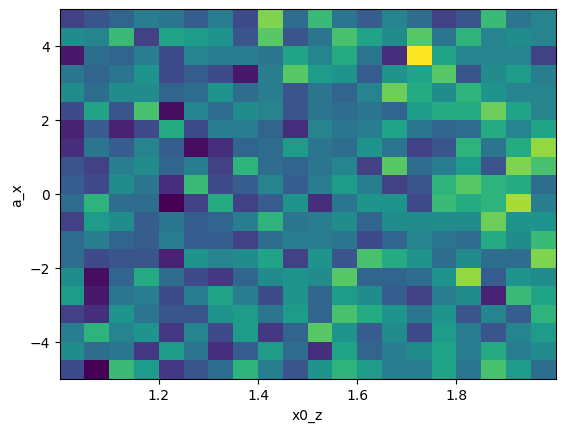

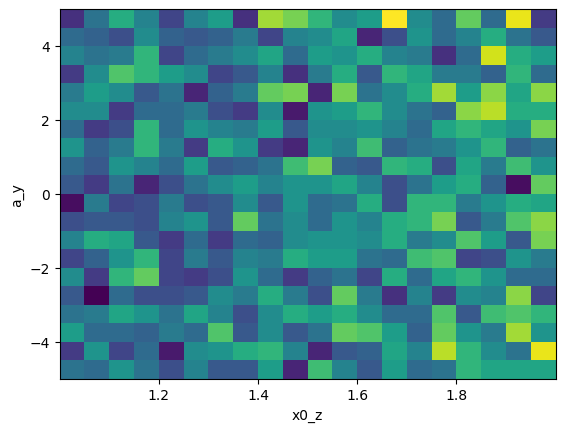

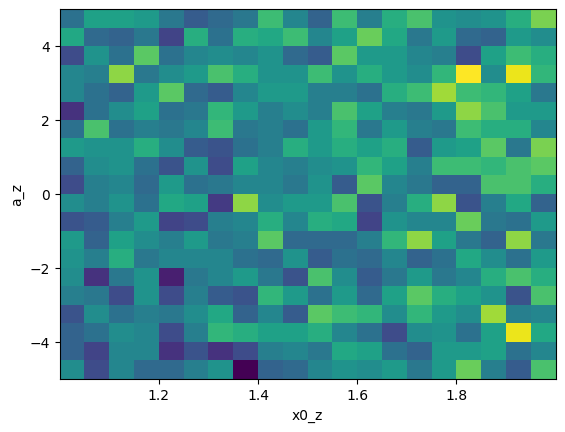

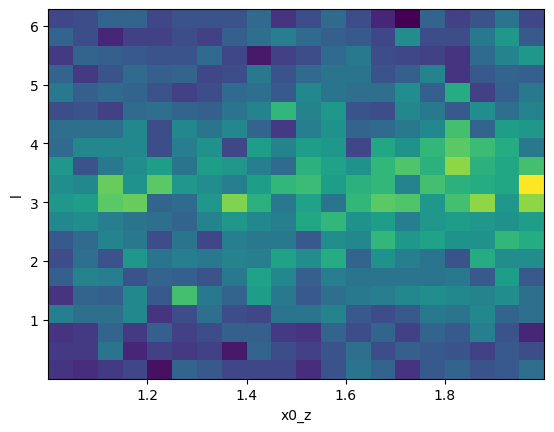

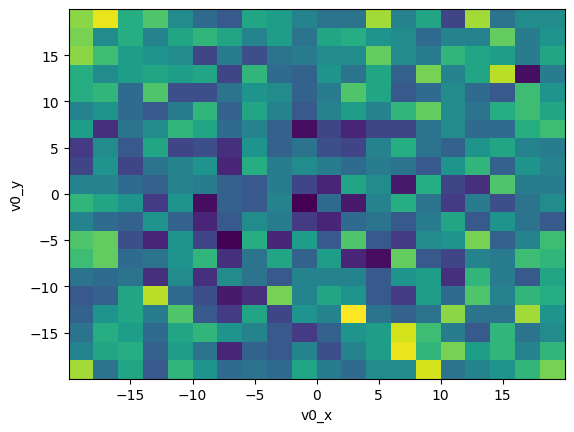

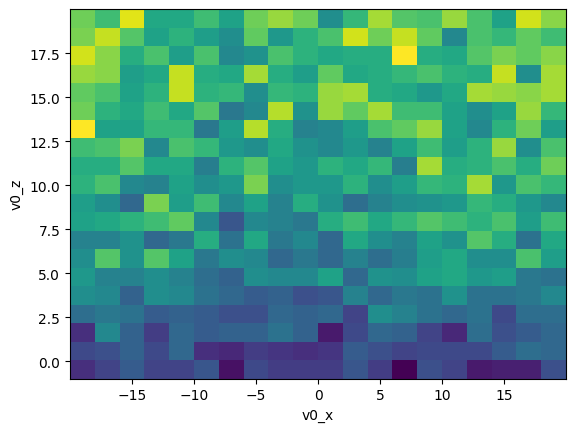

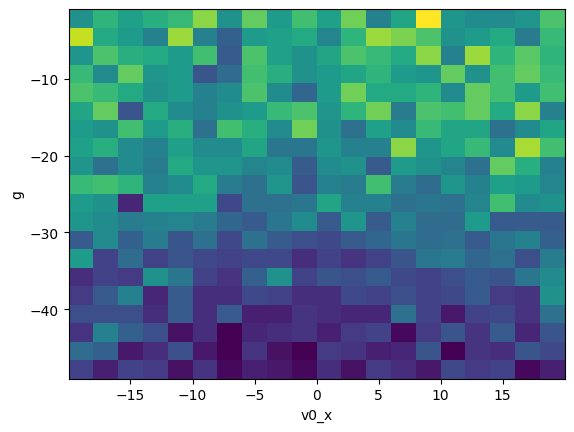

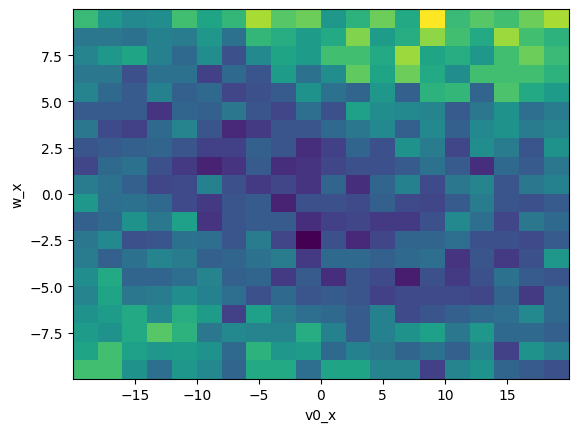

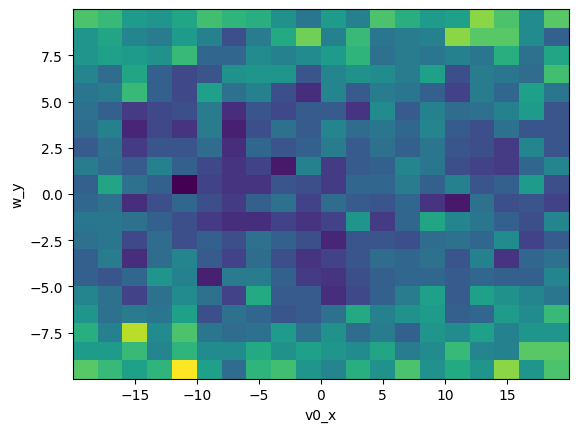

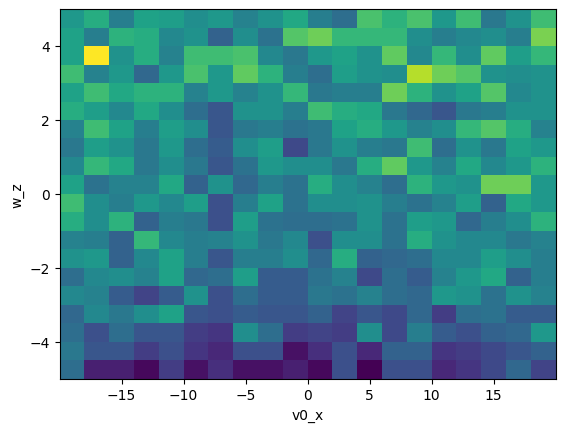

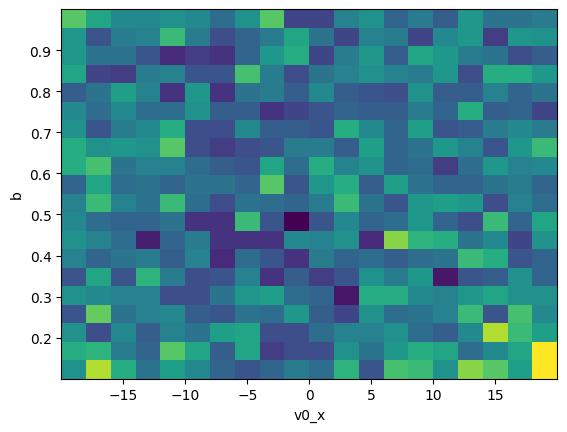

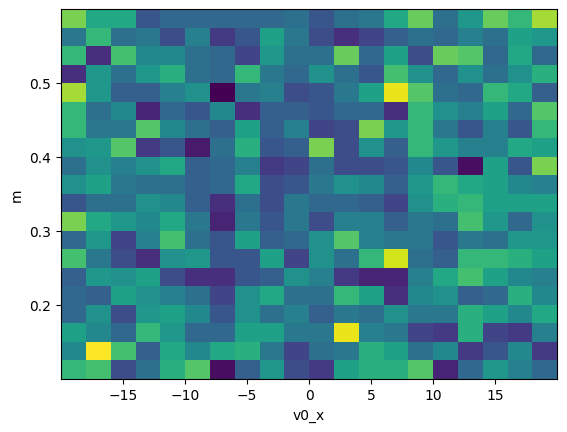

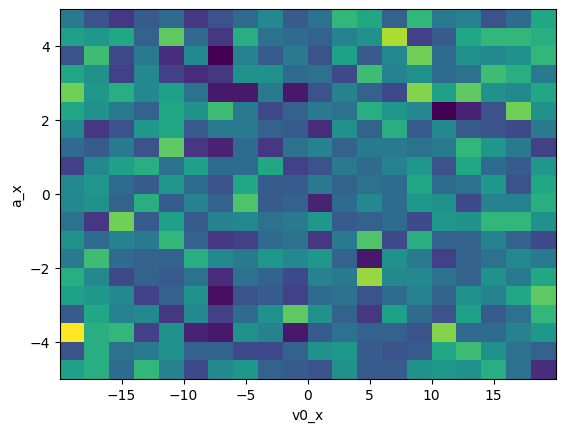

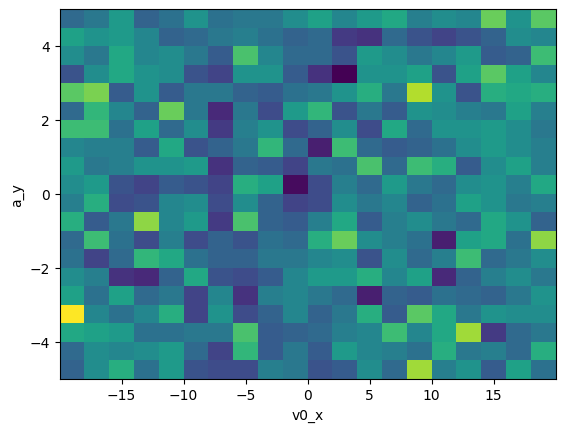

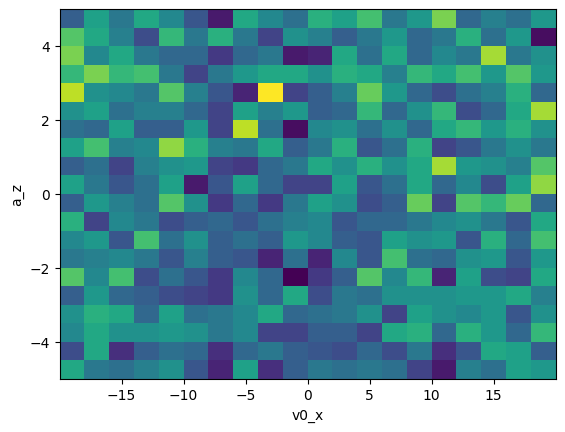

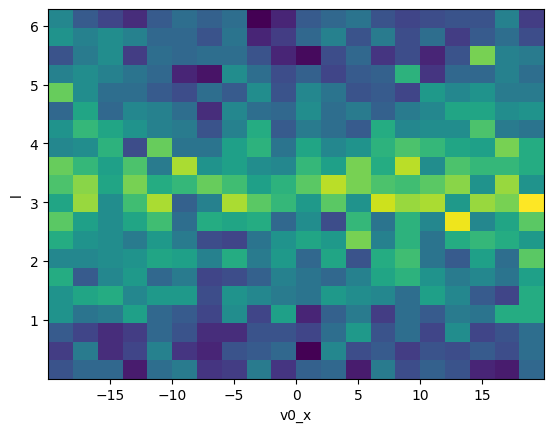

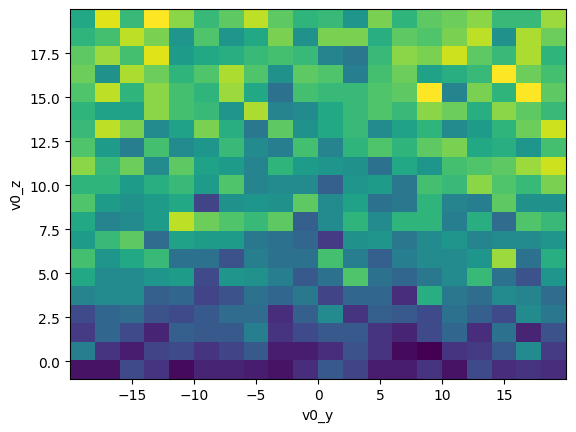

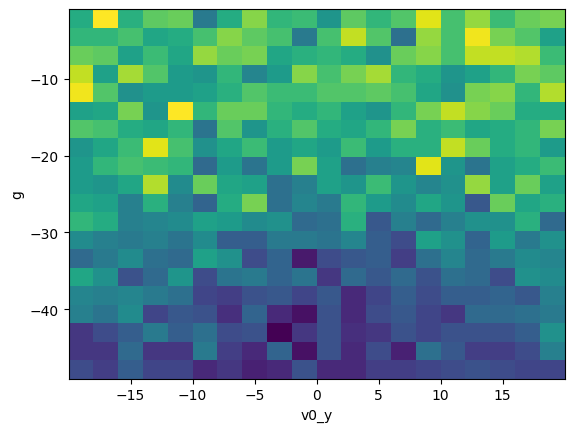

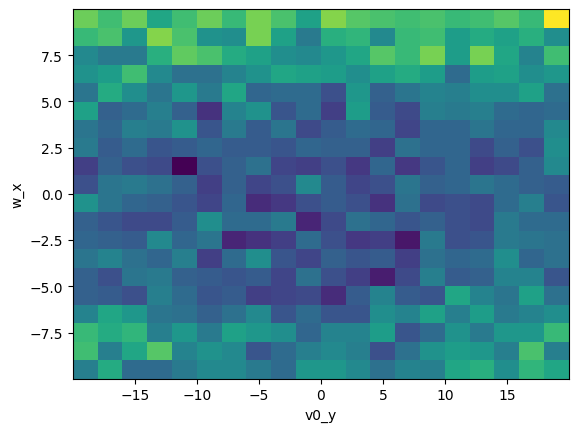

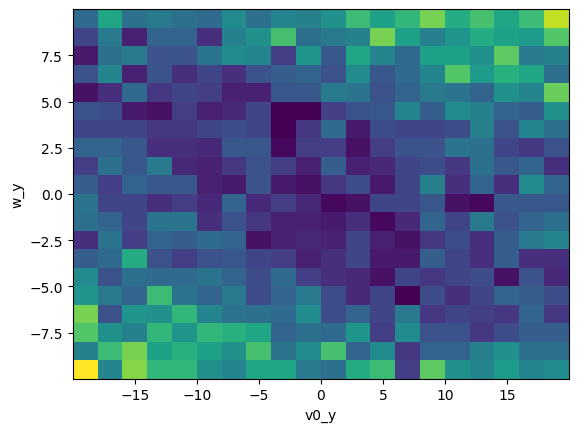

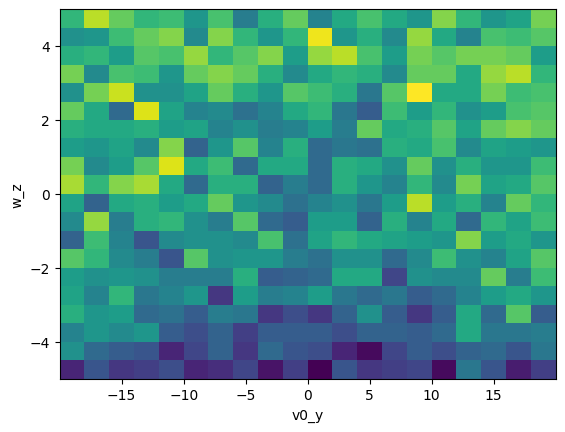

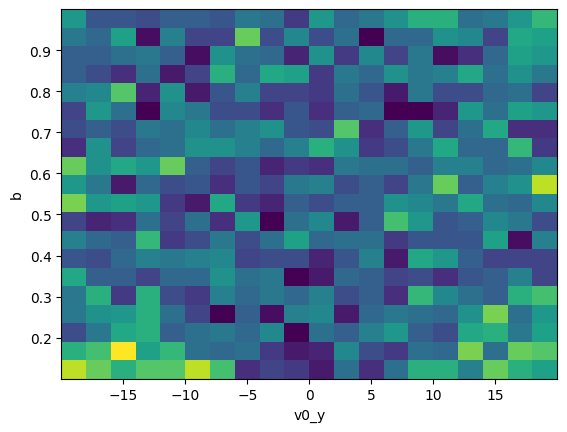

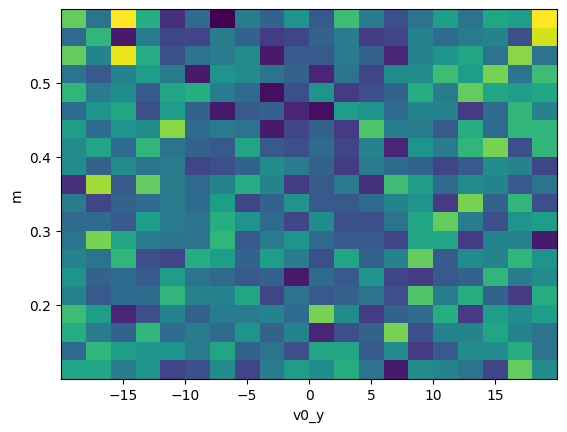

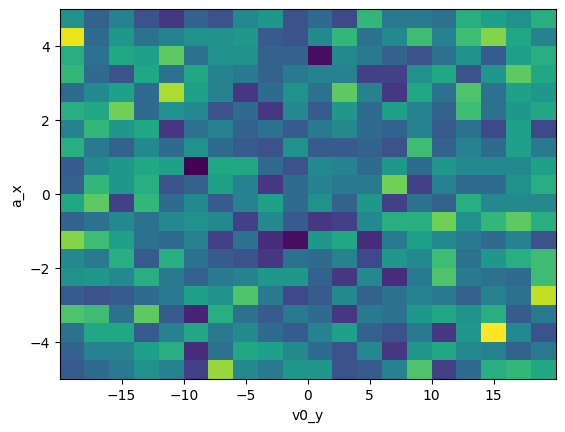

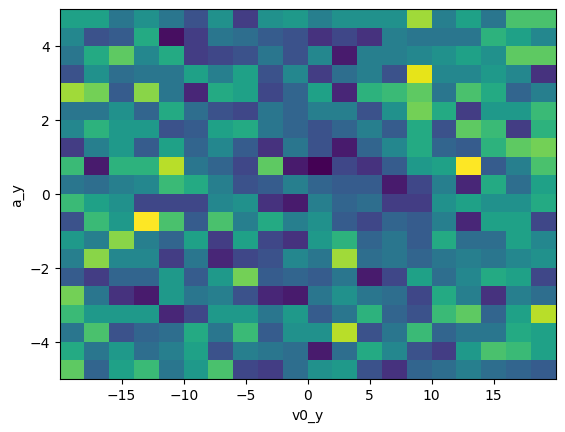

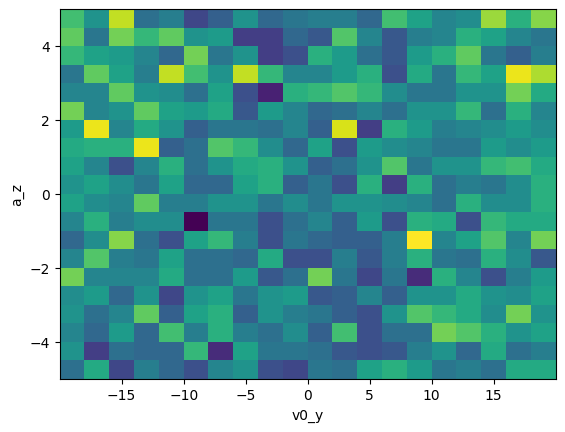

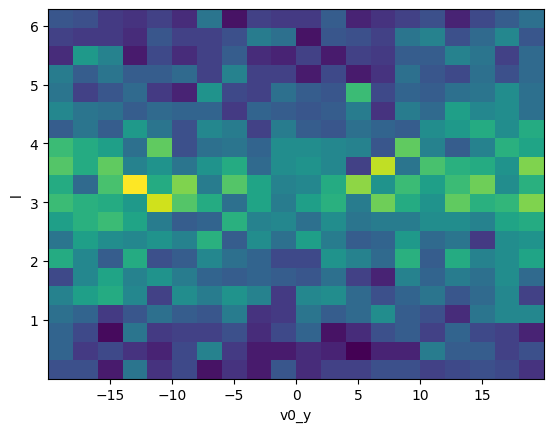

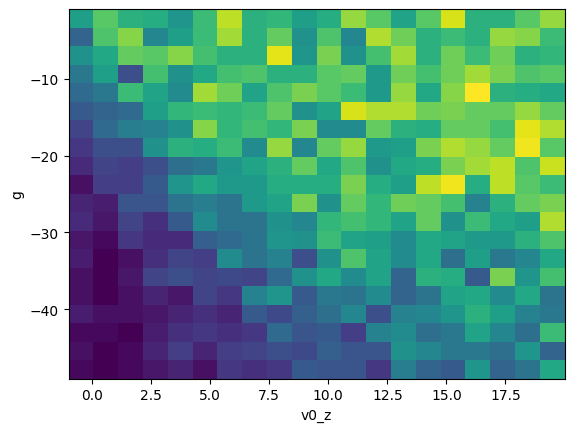

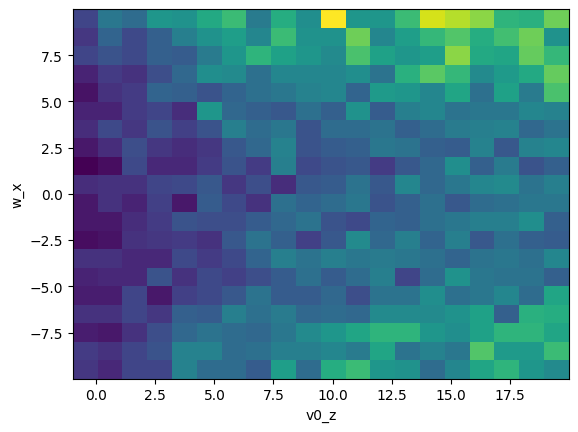

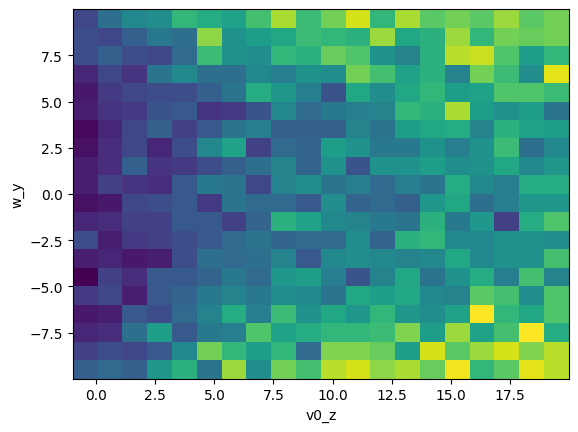

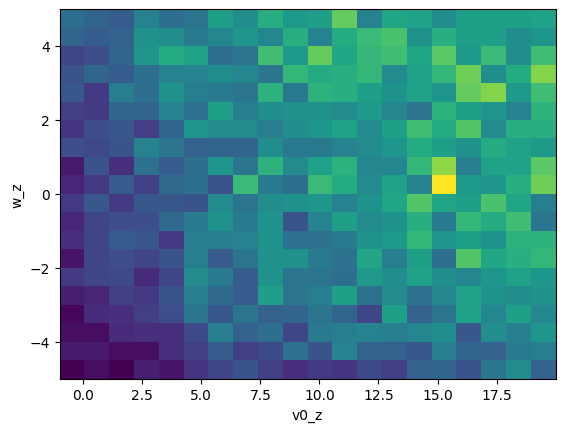

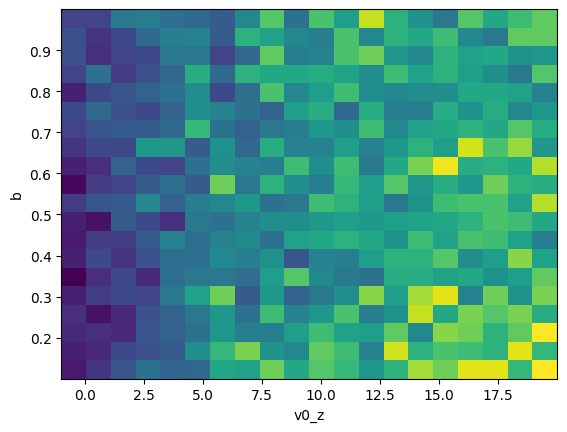

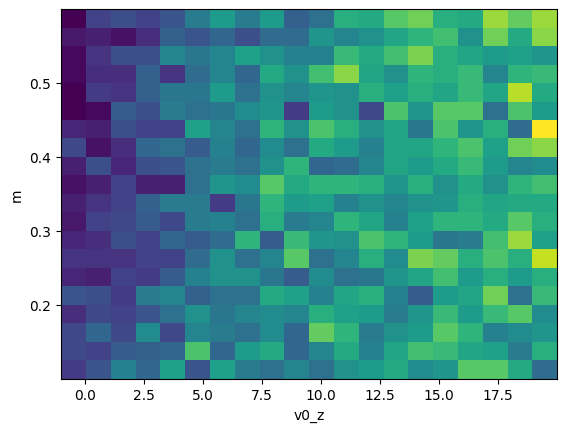

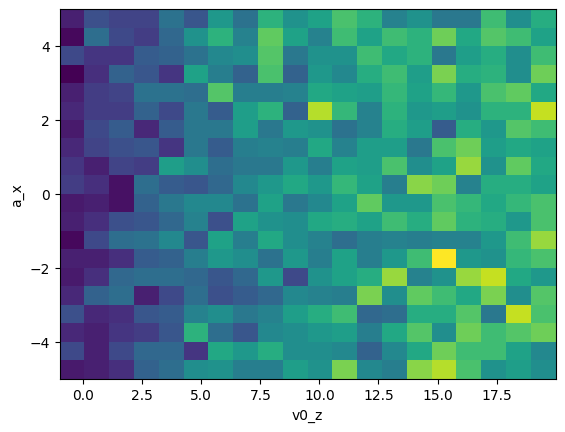

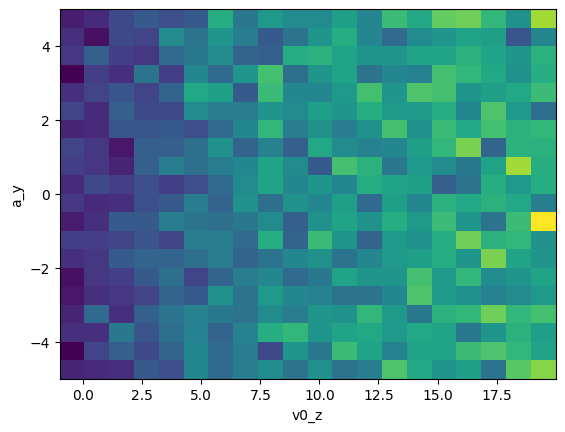

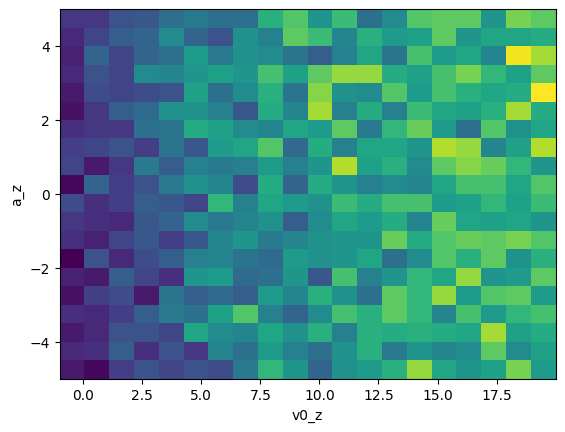

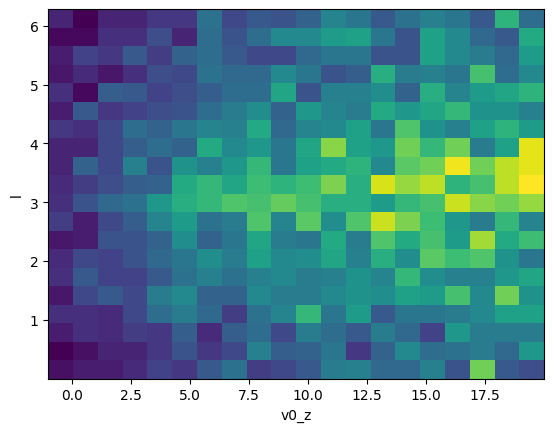

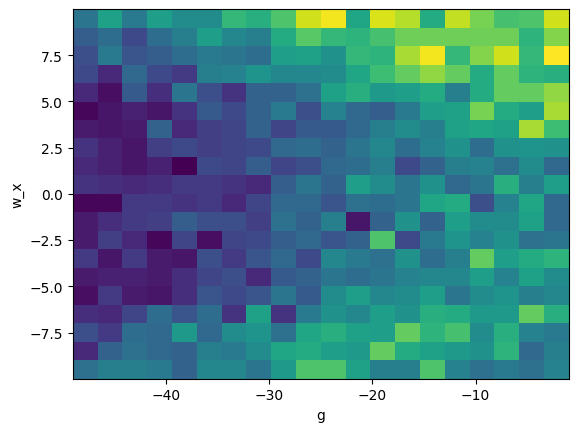

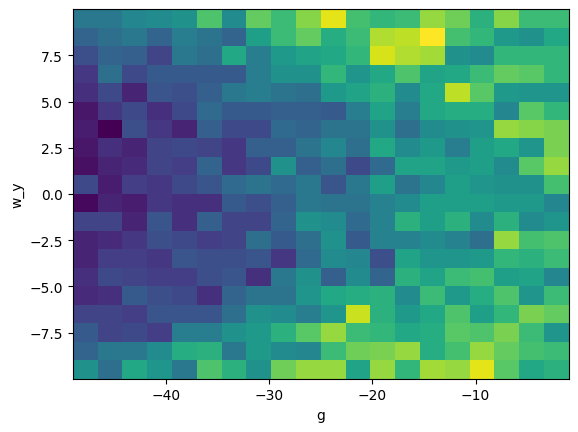

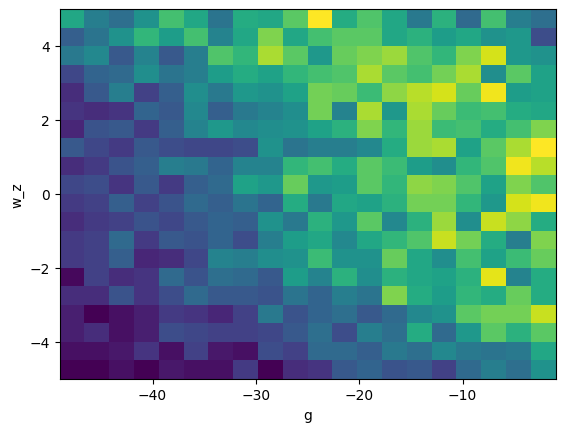

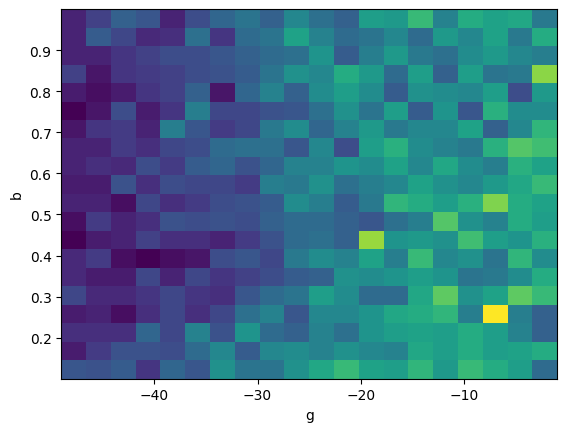

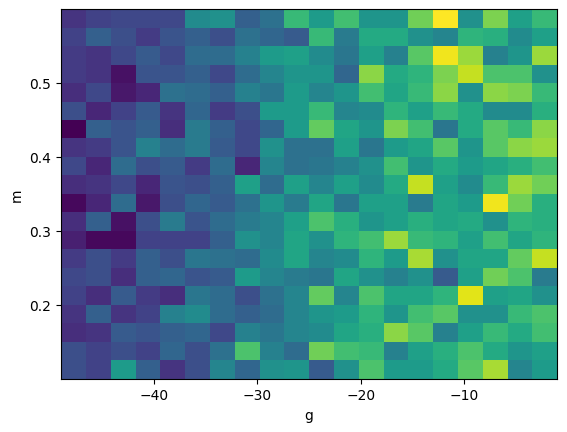

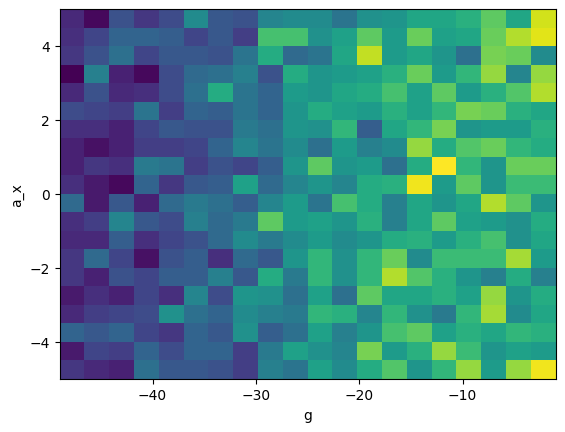

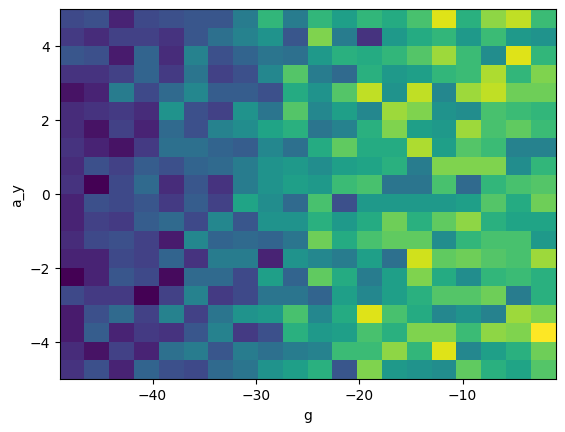

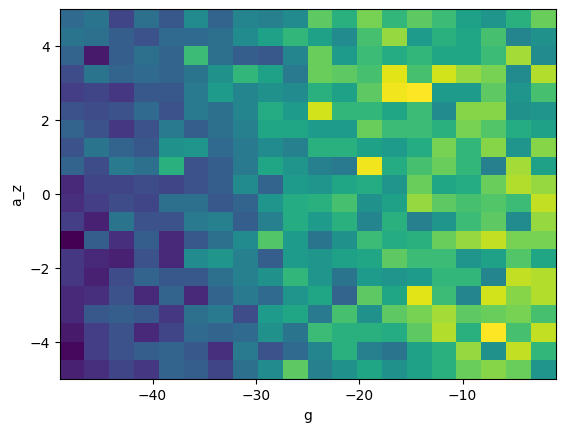

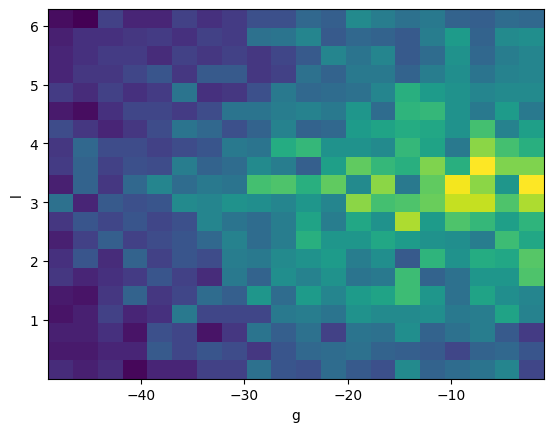

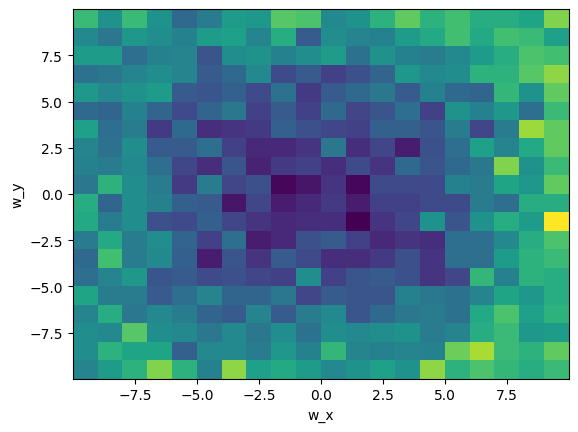

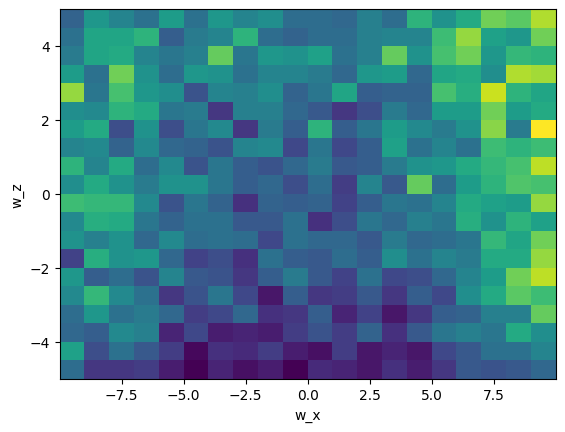

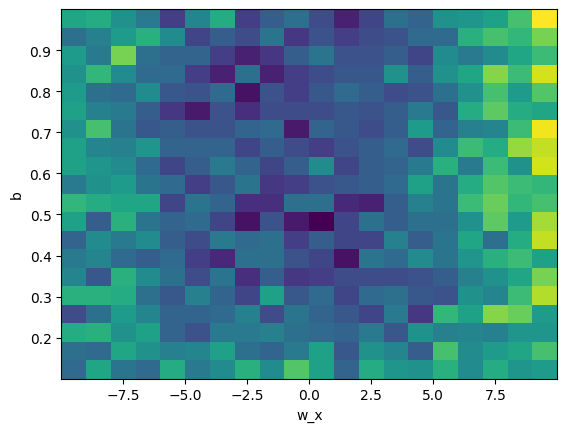

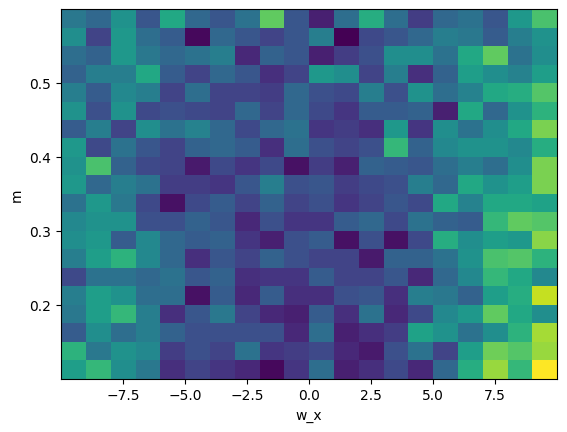

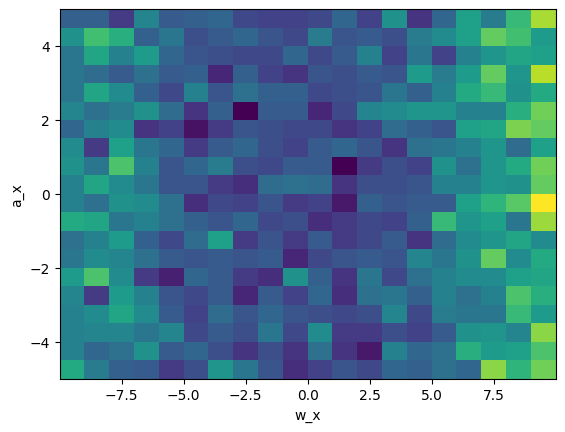

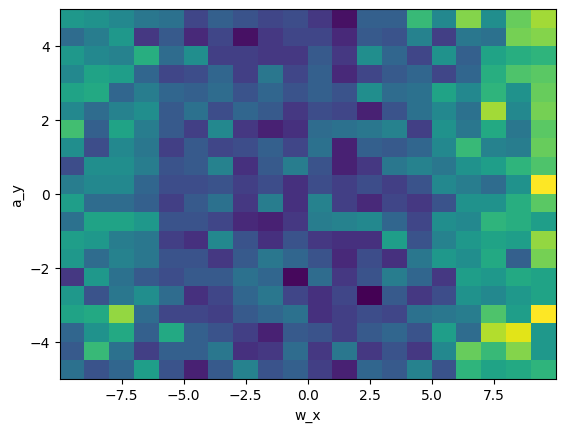

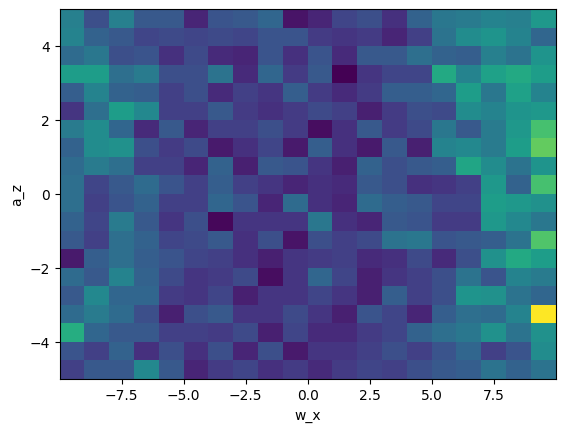

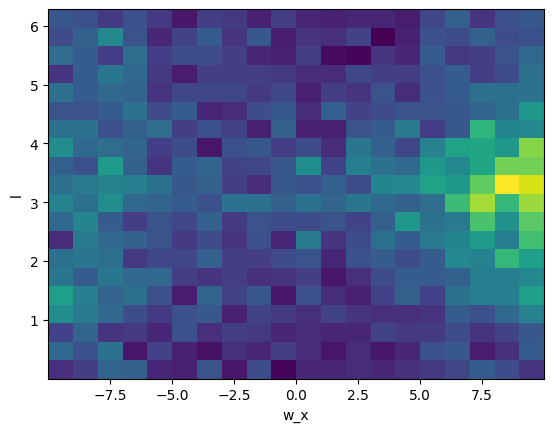

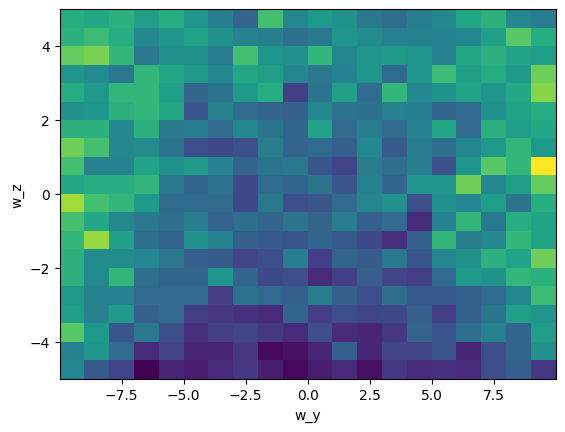

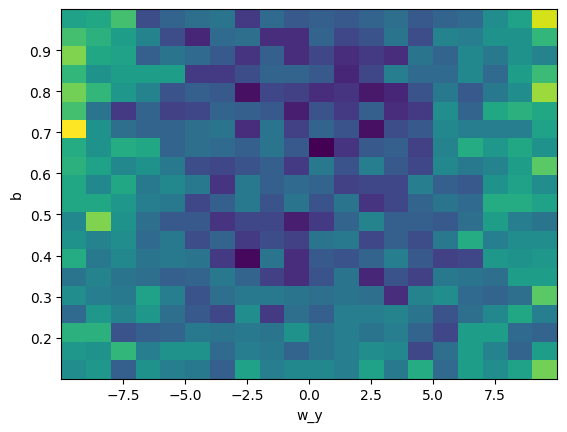

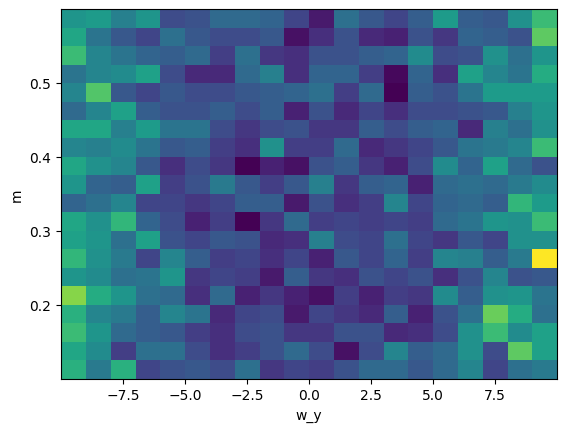

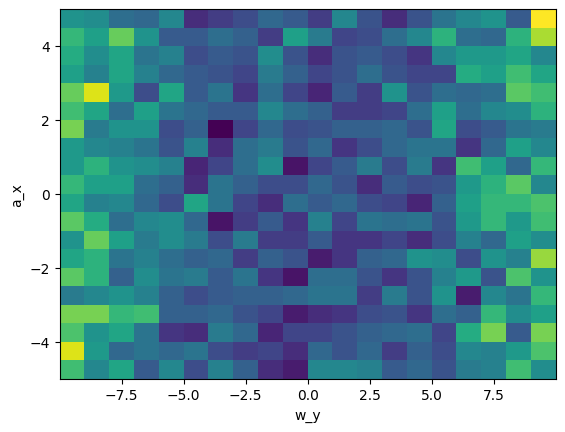

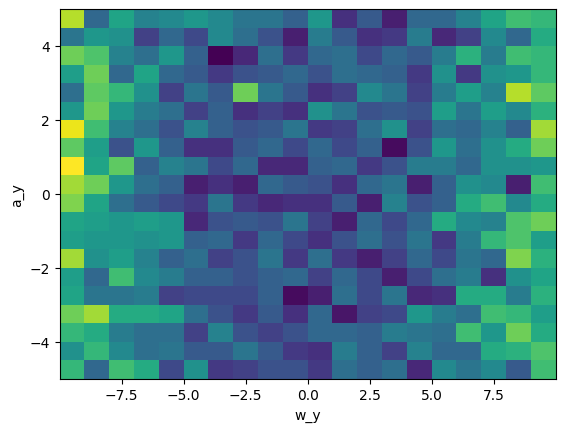

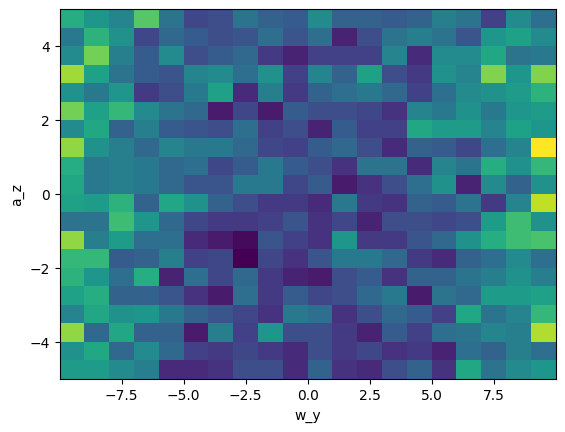

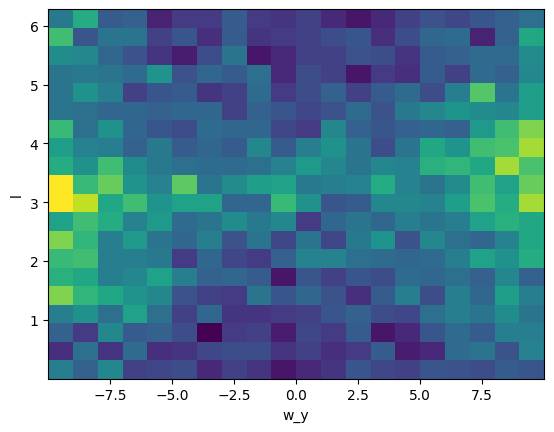

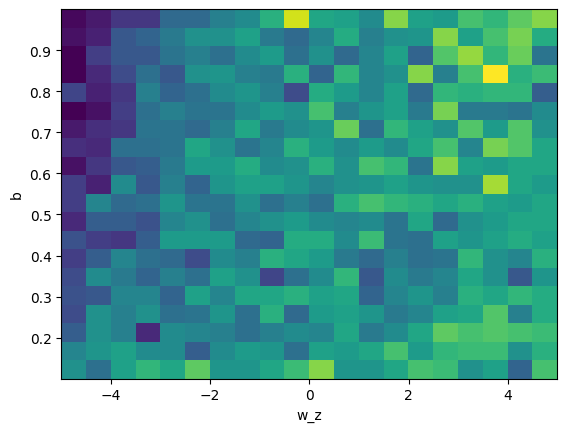

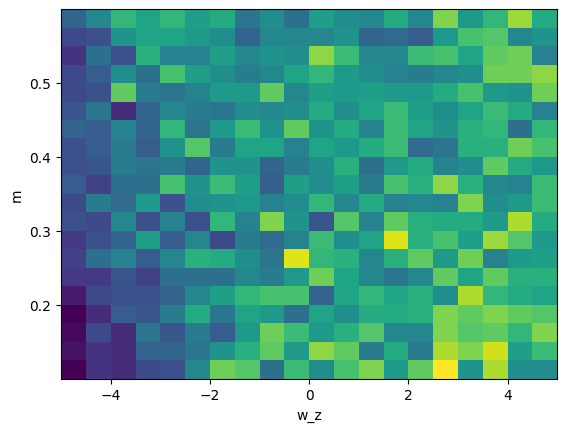

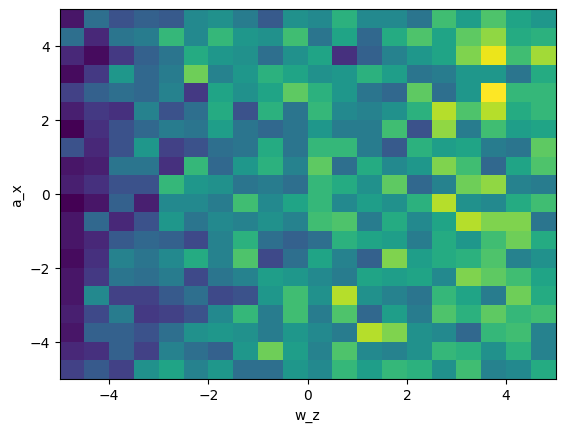

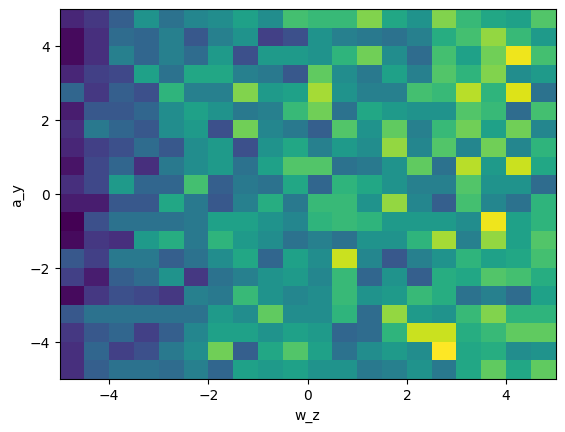

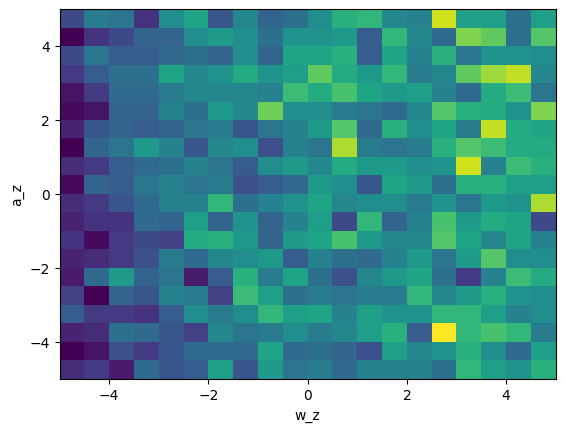

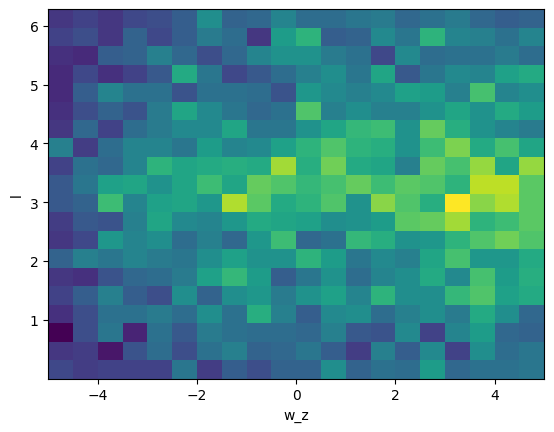

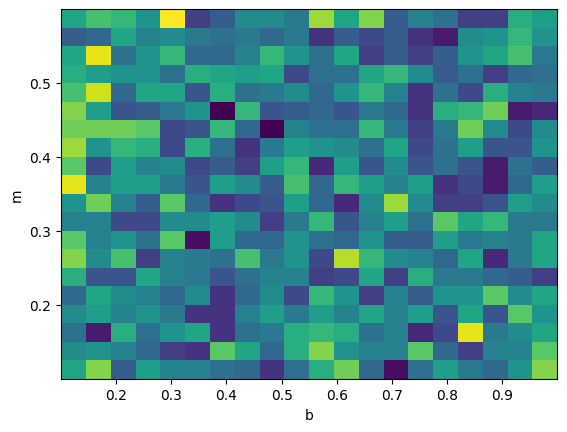

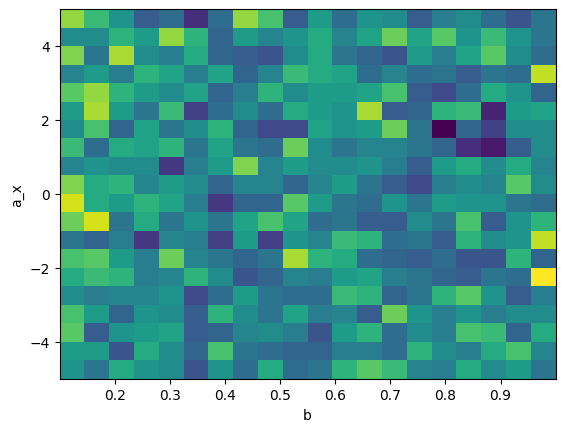

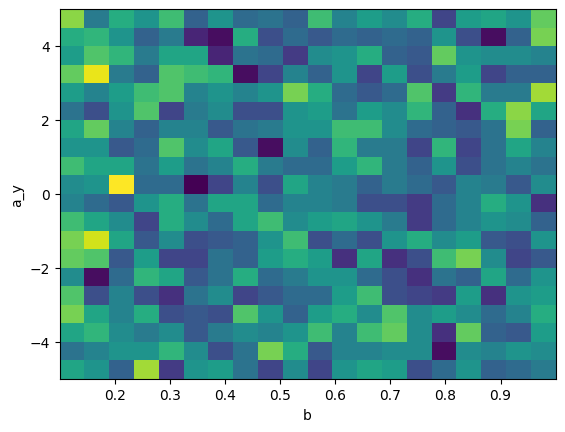

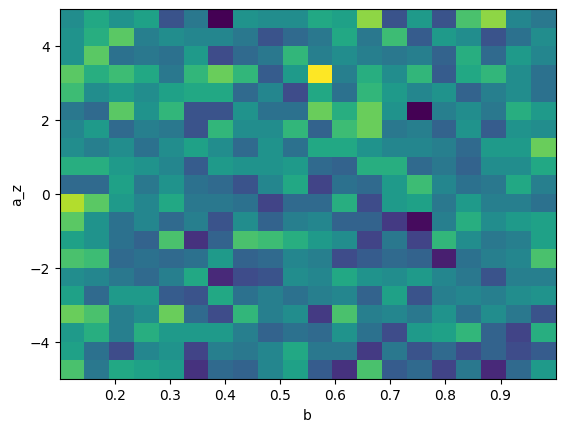

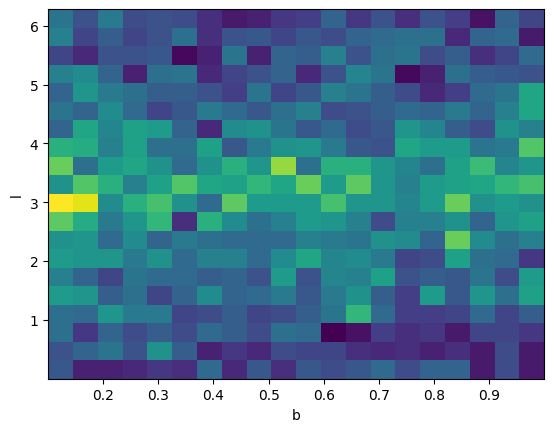

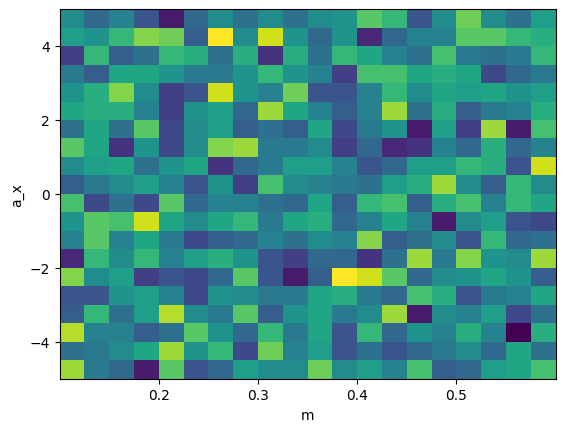

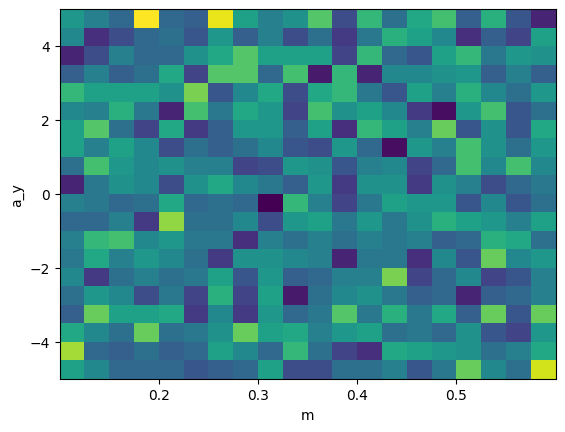

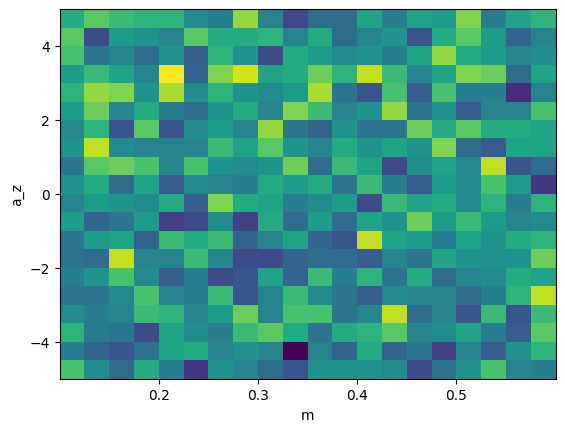

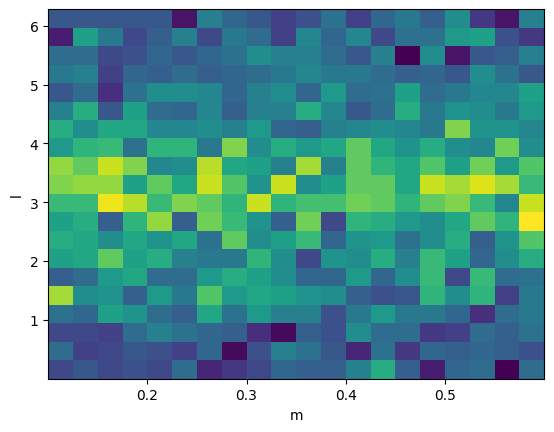

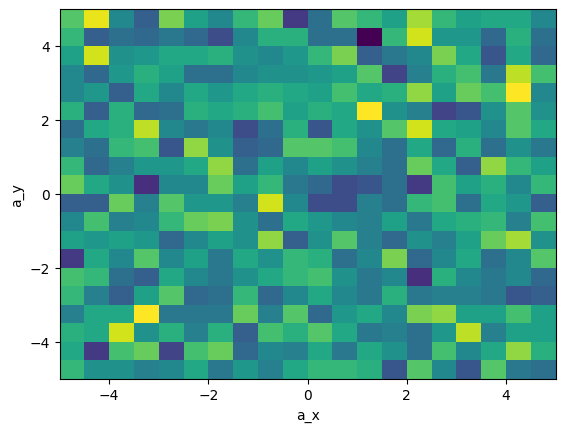

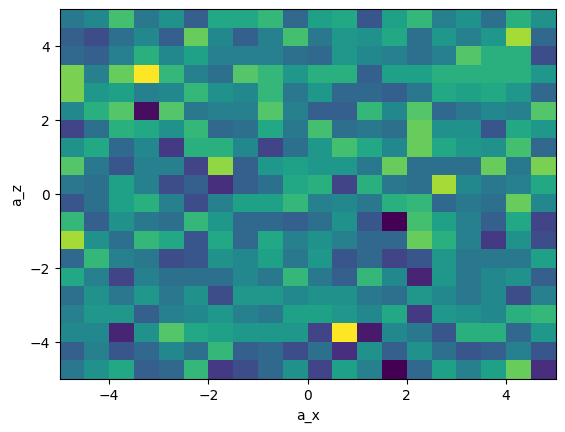

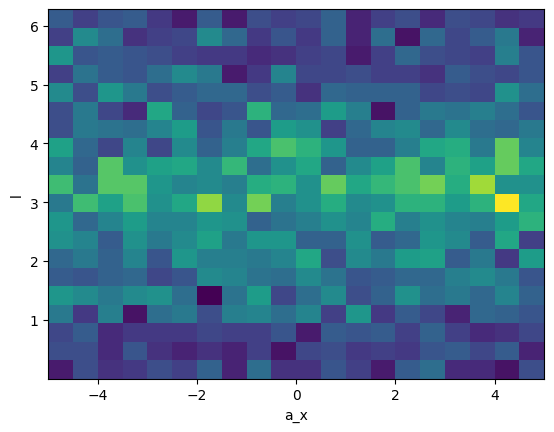

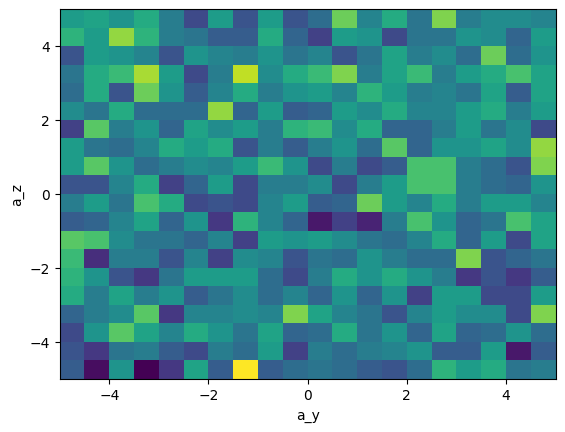

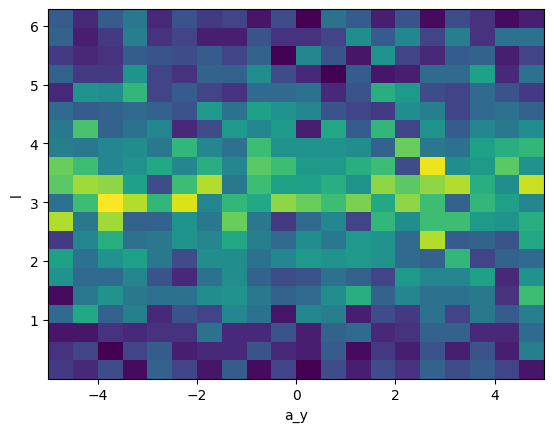

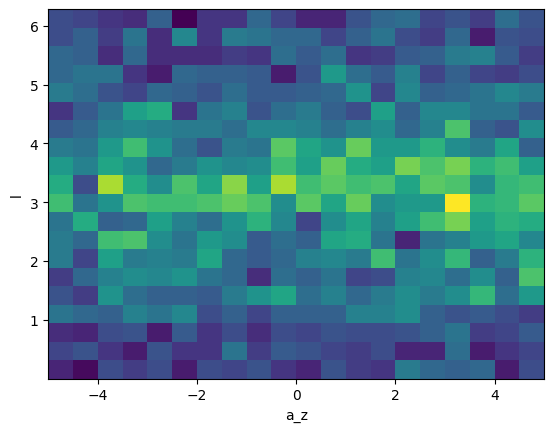

In [55]:
# plot 2d hist of all pairs
for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        plt.hist2d(df.iloc[:, i], df.iloc[:, j], bins=20)
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

In [56]:
# save df
df.to_csv('ballistic_parameters.csv', index=False)